### Questionnaires (qs.csv) - [One record per questionnaire per question per time point per visit per subject]

This dataset contains info on:
- **EDSS**
- FS scores 
- RAND-36 
- SF-12 
- BDI-II

In [243]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

possible_paths = [
    'C:/Users/lenne/OneDrive/Documenten/Master of Statistics and Data Science/2023-2024/Master thesis/MSOAC Placebo Data',
    'C:/Users/anaso/Desktop/SOFIA MENDES/KU Leuven/Master Thesis/MSOAC Placebo dataset/csv files'
]

file_name = 'qs.csv'
file_path = next(f'{path}/{file_name}' for path in possible_paths if os.path.exists(f'{path}/{file_name}'))

# Read the CSV file into a DataFrame
qs = pd.read_csv(file_path)

C:\Users\anaso\AppData\Local\Temp\ipykernel_4156\2053704189.py:17: DtypeWarning: Columns (4,9,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  qs = pd.read_csv(file_path)


Check how many missing values we have per column. 

In [244]:
missing_percentage_qs = (qs.isnull().sum() / len(qs)) * 100
missing_qs = pd.DataFrame({'Column Name': missing_percentage_qs.index, 'Missing Percentage': missing_percentage_qs.values})
missing_qs = missing_qs.sort_values(by='Missing Percentage', ascending=False)
print(missing_qs)

   Column Name  Missing Percentage
29    QSRFTDTC          100.000000
28    QSTPTREF          100.000000
5       QSSPID          100.000000
27      QSELTM          100.000000
26    QSTPTNUM          100.000000
25       QSTPT          100.000000
23       QSDTC          100.000000
11    QSORRESU          100.000000
19      QSEVAL          100.000000
18     QSDRVFL          100.000000
14    QSSTRESU          100.000000
16    QSREASND           99.997550
15      QSSTAT           99.643583
17      QSBLFL           89.925420
22     VISITDY           82.796628
4      QSGRPID           80.735645
30    QSEVLINT           65.621993
9       QSSCAT           59.320312
24        QSDY           24.402110
13    QSSTRESN            0.578733
10     QSORRES            0.476263
12    QSSTRESC            0.356417
1       DOMAIN            0.000000
20    VISITNUM            0.000000
21       VISIT            0.000000
8        QSCAT            0.000000
7       QSTEST            0.000000
6     QSTESTCD      

Remove columns with more than 80% missingness as well as redundant columns.

In [245]:
# Set the threshold for missing percentage
threshold = 80

# Filter columns based on missing percentage
columns_to_drop = missing_qs[missing_qs['Missing Percentage'] >= threshold]['Column Name']

# Drop columns from the DataFrame
qs = qs.drop(columns=columns_to_drop)

# Remove redundant columns
qs = qs.drop(columns=['STUDYID', 'DOMAIN', 'QSTESTCD']) #, 'QSORRES'

In [246]:
qs.sort_values(by=['USUBJID', 'QSSEQ'], inplace=True)
qs.head()

,USUBJID,QSSEQ,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESC,QSSTRESN,VISITNUM,VISIT,QSDY,QSEVLINT
216853,MSOAC/0014,1,EDSS01-Expanded Disability Score,EDSS,NaN,1,1,1.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216854,MSOAC/0014,2,KFSS1-Pyramidal Functions,KFSS,NaN,1,1,1.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216855,MSOAC/0014,3,KFSS1-Cerebellar Functions,KFSS,NaN,0,0,0.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216856,MSOAC/0014,4,KFSS1-Brain Stem Functions,KFSS,NaN,0,0,0.0,1.0,SCREENING D-28 TO -2,NaN,NaN
216857,MSOAC/0014,5,KFSS1-Sensory Functions,KFSS,NaN,0,0,0.0,1.0,SCREENING D-28 TO -2,NaN,NaN


Overview of all dropped columns:

- **STUDYID**: Study Identifier (irrelevant - always the same value)
- **DOMAIN**: Domain Abbreviation (irrelevant - always the same value)
- **QSTESTCD**: Question Short Name (contains the same info as QSTEST = Question Name)
- **QSORRES**: Finding in Original Units (contains the same info as "QSSTRESC" = Character Result/Finding in Std Format, except that there can be incosistencies in the values of QSORRES)
- **QSRFTDTC, QSTPTREF, QSSPID, QSELTM, QSTPTNUM, QSTPT, QSDTC, QSORRESU, QSEVAL, QSDRVFL, QSSTRESU**: all values missing and not even mentioned in the data dictionary 
- **QSREASND**: Reason Not Performed (missing for 99.998% of observations)
- **QSSTAT**: Completion Status (missing for 99.6% of observations)
- **QSBLFL**: Baseline Flag (missing for 89.9% of observations)
- **VISITDY**: Visit Day (missing for 82.8% of observations) -- **maybe keep this one since we also keep it for some other datasets**
- **QSGRPID**: Group ID (missing for 80.7% of observations)

In [247]:
unique_usubjid_count = qs['USUBJID'].nunique()
print("Number of unique values in USUBJID:", unique_usubjid_count)

Number of unique values in USUBJID: 2465


**We have data on all patients in the dataset for the questionnaires**

Which columns are numeric and categorical? (see also SDTM fields in Data Dictionary)

In [248]:
# Create an empty list to store column types
column_types = []

# Iterate through each column
for column, dtype in qs.dtypes.items():
    # Categorize columns
    if dtype == 'object':
        column_type = 'categorical'
    elif dtype in ['int64', 'float64']:
        column_type = 'numeric'
    else:
        column_type = 'other'

    # Append to the list
    column_types.append({'Column': column, 'Type': column_type})

# Create a DataFrame from the list
column_types_df = pd.DataFrame(column_types)

# Display the resulting DataFrame
column_types_df

,Column,Type
0,USUBJID,categorical
1,QSSEQ,numeric
2,QSTEST,categorical
3,QSCAT,categorical
4,QSSCAT,categorical
5,QSORRES,categorical
6,QSSTRESC,categorical
7,QSSTRESN,numeric
8,VISITNUM,numeric
9,VISIT,categorical


- Descriptive statistics for numeric variables

In [249]:
numeric_columns = ['QSSEQ', 'QSSTRESN', 'VISITNUM', 'QSDY']

descriptive_numeric = {
    'Count': qs[numeric_columns].count(),
    'Missing Cases': qs[numeric_columns].isna().sum(),
    'Missing %': round((qs[numeric_columns].isna().sum() / len(qs)) * 100, 2),  
    'Median': qs[numeric_columns].median(),
    'Standard Deviation': qs[numeric_columns].std()
}

num_qs = pd.DataFrame(descriptive_numeric)
num_qs

,Count,Missing Cases,Missing %,Median,Standard Deviation
QSSEQ,448912,0,0.00,99.0,79.650454
QSSTRESN,446314,2598,0.58,2.0,1.861824
VISITNUM,448912,0,0.00,20.0,229.172925
QSDY,339368,109544,24.40,253.0,315.596324


- QSSEQ (Sequence number)

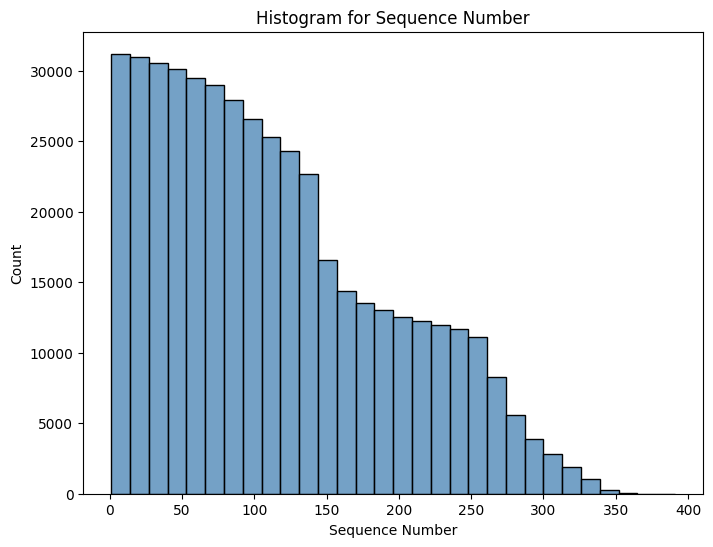

In [250]:
QSSEQ = qs['QSSEQ'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(QSSEQ, kde=False, color='steelblue', bins=30)
plt.xlabel('Sequence Number')
plt.ylabel('Count')
plt.title('Histogram for Sequence Number')
plt.show()

- QSSTRESN (Numeric Finding in Standard Units)

In [251]:
# Filter rows for EDSS
filtered_rows = qs[qs['QSTEST']=='EDSS01-Expanded Disability Score']

# Group by EDSS and USUBJID, then count the number of rows for each group
outcome_measure_counts = filtered_rows.groupby(['QSTEST', 'USUBJID']).size().reset_index(name='Observation_Count')
outcome_measure_counts

,QSTEST,USUBJID,Observation_Count
0,EDSS01-Expanded Disability Score,MSOAC/0014,4
1,EDSS01-Expanded Disability Score,MSOAC/0016,1
2,EDSS01-Expanded Disability Score,MSOAC/0019,14
3,EDSS01-Expanded Disability Score,MSOAC/0024,10
4,EDSS01-Expanded Disability Score,MSOAC/0030,5
...,...,...,...
2460,EDSS01-Expanded Disability Score,MSOAC/9986,5
2461,EDSS01-Expanded Disability Score,MSOAC/9987,16
2462,EDSS01-Expanded Disability Score,MSOAC/9995,20
2463,EDSS01-Expanded Disability Score,MSOAC/9998,14


In [252]:
outcome_measure_counts.groupby('QSTEST')['Observation_Count'].describe()

,count,mean,std,min,25%,50%,75%,max
QSTEST,,,,,,,,
EDSS01-Expanded Disability Score,2465.0,10.663286,5.024798,1.0,6.0,11.0,14.0,35.0


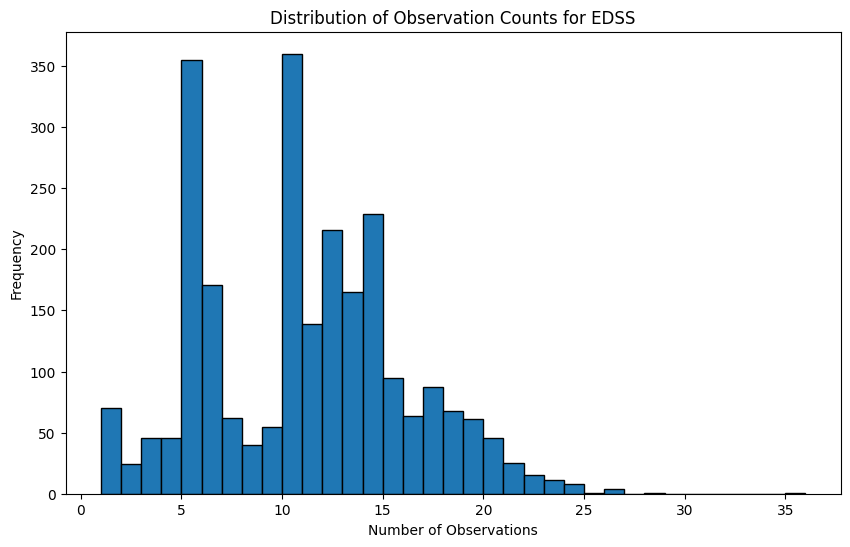

In [253]:
plt.figure(figsize=(10, 6))
plt.hist(outcome_measure_counts['Observation_Count'], bins=range(1, max(outcome_measure_counts['Observation_Count']) + 2), edgecolor='black')
plt.title(f'Distribution of Observation Counts for EDSS')
plt.xlabel('Number of Observations')
plt.ylabel('Frequency')
plt.show()

- VISITNUM (Visit Number)

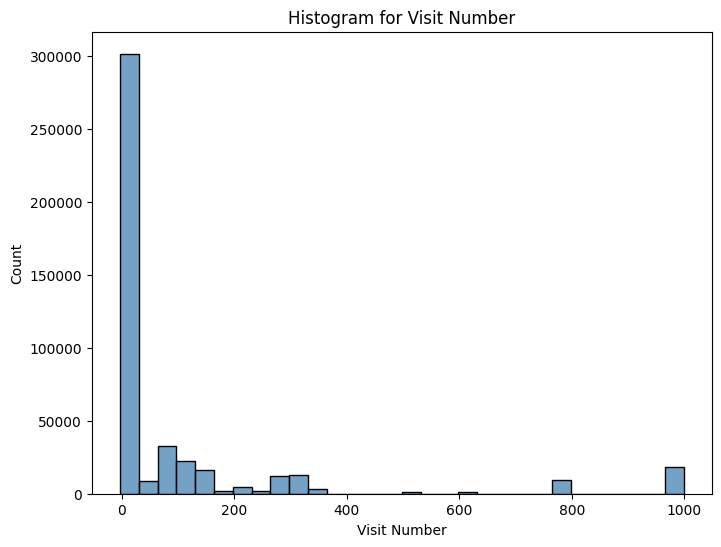

In [254]:
VISITNUM_qs = qs['VISITNUM'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(VISITNUM_qs, kde=False, color='steelblue', bins=30)
plt.xlabel('Visit Number')
plt.ylabel('Count')
plt.title('Histogram for Visit Number')
plt.show()

- QSDY (Study Day of Collection) 

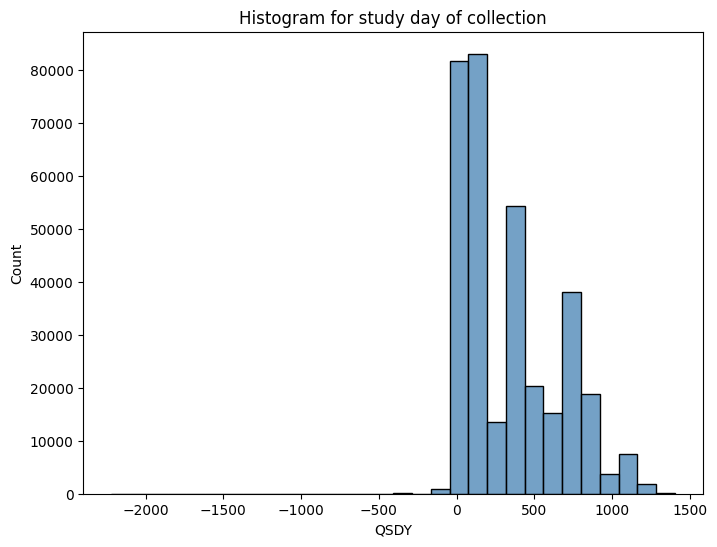

In [255]:
QSDY = qs['QSDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(QSDY, kde=False, color='steelblue', bins=30)
plt.xlabel('QSDY')
plt.ylabel('Count')
plt.title('Histogram for study day of collection')
plt.show()

In [256]:
QSDY.describe()

count    339368.000000
mean        331.487830
std         315.596324
min       -2220.000000
25%          84.000000
50%         253.000000
75%         563.000000
max        1404.000000
Name: QSDY, dtype: float64

In [257]:
unique_QSDY_values_count = qs['QSDY'].nunique()
unique_QSDY_values_count

1091

1091 unique values of study day of collection

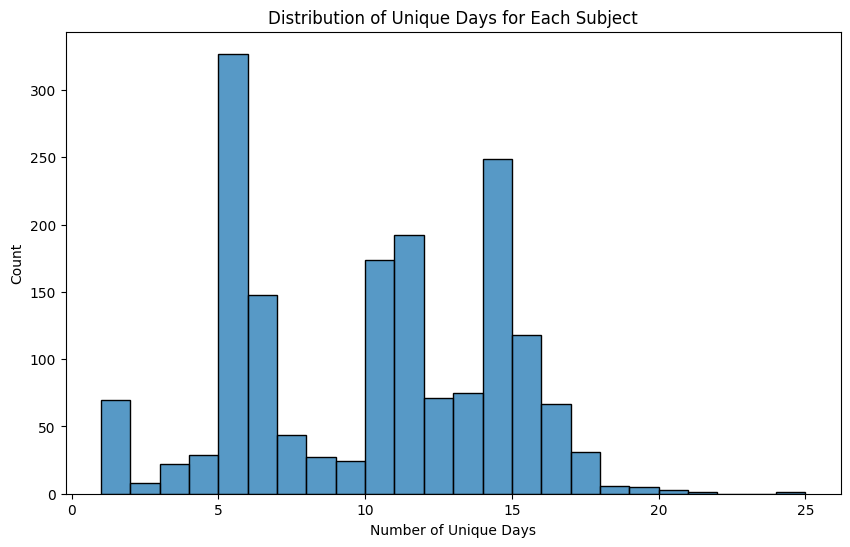

In [258]:
subject_days_count = qs.groupby('USUBJID')['QSDY'].nunique()
plt.figure(figsize=(10, 6))
sns.histplot(subject_days_count, bins=range(1, subject_days_count.max() + 2), kde=False)
plt.title('Distribution of Unique Days for Each Subject')
plt.xlabel('Number of Unique Days')
plt.ylabel('Count')
plt.show()

Distribution of the length of follow-up

Number of unique values in the 'Difference' column: 503


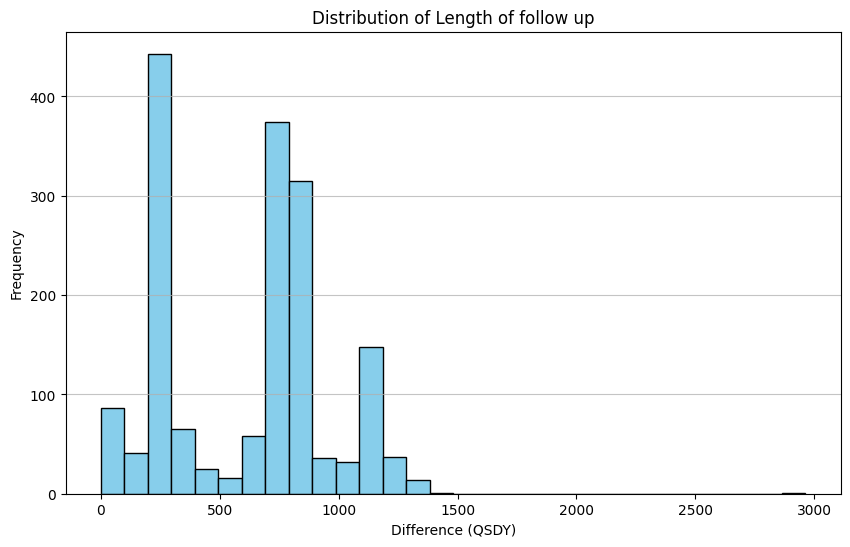

In [259]:
# Calculate the maximum and minimum values of QSDY for each unique patient ID
qs_max_min = qs.groupby('USUBJID')['QSDY'].agg(['max', 'min']).reset_index()

# Calculate the difference between the maximum and minimum values
qs_max_min['Difference'] = qs_max_min['max'] - qs_max_min['min']

# Display the number of unique values in the "Difference" column
num_unique_values = qs_max_min['Difference'].nunique()
print(f"Number of unique values in the 'Difference' column: {num_unique_values}")

# Plot the histogram of the distribution of the difference
plt.figure(figsize=(10, 6))
plt.hist(qs_max_min['Difference'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Length of follow up')
plt.xlabel('Difference (QSDY)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

- Descriptive statistics for categorical variables

In [260]:
categorical_columns = ['QSTEST', 'QSCAT', 'QSSCAT', 'QSORRES', 'QSSTRESC', 'VISIT', 'QSEVLINT']

descriptive_categorical = {}
for col in categorical_columns:
    descriptive_categorical[col] = {
        'Count': qs[col].count(),
        'Missing Cases': qs[col].isna().sum(),
        'Unique Values': qs[col].nunique(),
        'Mode': qs[col].mode().values[0],
        'Mode Frequency': qs[col].value_counts().max()
    }

cat_qs = pd.DataFrame(descriptive_categorical).T
cat_qs

,Count,Missing Cases,Unique Values,Mode,Mode Frequency
QSTEST,448912,0,82,EDSS01-Expanded Disability Score,26285
QSCAT,448912,0,5,KFSS,188254
QSSCAT,182616,266296,14,PHYSICAL FUNCTIONING,48763
QSORRES,446774,2138,336,0,99587
QSSTRESC,447312,1600,166,0,110990
VISIT,448912,0,110,BASELINE,39162
QSEVLINT,154327,294585,2,-P4W,104924


- Number of observations for each QSTEST (Question Name) category

In [261]:
QSTEST_counts = qs['QSTEST'].value_counts().reset_index()
QSTEST_counts.columns = ['QSTEST', 'Count']
QSTEST_counts

,QSTEST,Count
0,EDSS01-Expanded Disability Score,26285
1,KFSS1-Sensory Functions,26219
2,KFSS1-Brain Stem Functions,26218
3,KFSS1-Bowel and Bladder Functions,26217
4,KFSS1-Cerebral or Mental Functions,26216
...,...,...
77,SF121-Amt Time Interfere Social Activity,1491
78,SF121-Phys Health: Limit Kind of Work,1490
79,KFSS1-Other Functions Specify,575
80,KFSS1-Weakness Interferes With Testing,423


- Number of observations for each QSCAT (Category of Question) category

In [262]:
QSCAT_counts = qs['QSCAT'].value_counts().reset_index()
QSCAT_counts.columns = ['QSCAT', 'Count']
QSCAT_counts

,QSCAT,Count
0,KFSS,188254
1,RAND-36 V1.0,164716
2,BDI-II,51756
3,EDSS,26285
4,SF-12 V2,17901


- Number of observations for each QSSCAT (subcategory for question) category

In [263]:
QSSCAT_counts = qs['QSSCAT'].value_counts().reset_index()
QSSCAT_counts.columns = ['QSSCAT', 'Count']
QSSCAT_counts

,QSSCAT,Count
0,PHYSICAL FUNCTIONING,48763
1,GENERAL HEALTH,24348
2,EMOTIONAL WELL-BEING,22887
3,ROLE LIMITATIONS DUE TO PHYSICAL HEALTH,18305
4,ENERGY/FATIGUE,18304
5,ROLE LIMITATIONS DUE TO EMOTIONAL PROBLEMS,13718
6,SOCIAL FUNCTIONING,10630
7,PAIN,9149
8,HEALTH CHANGE,4581
9,ROLE EMOTIONAL,2984


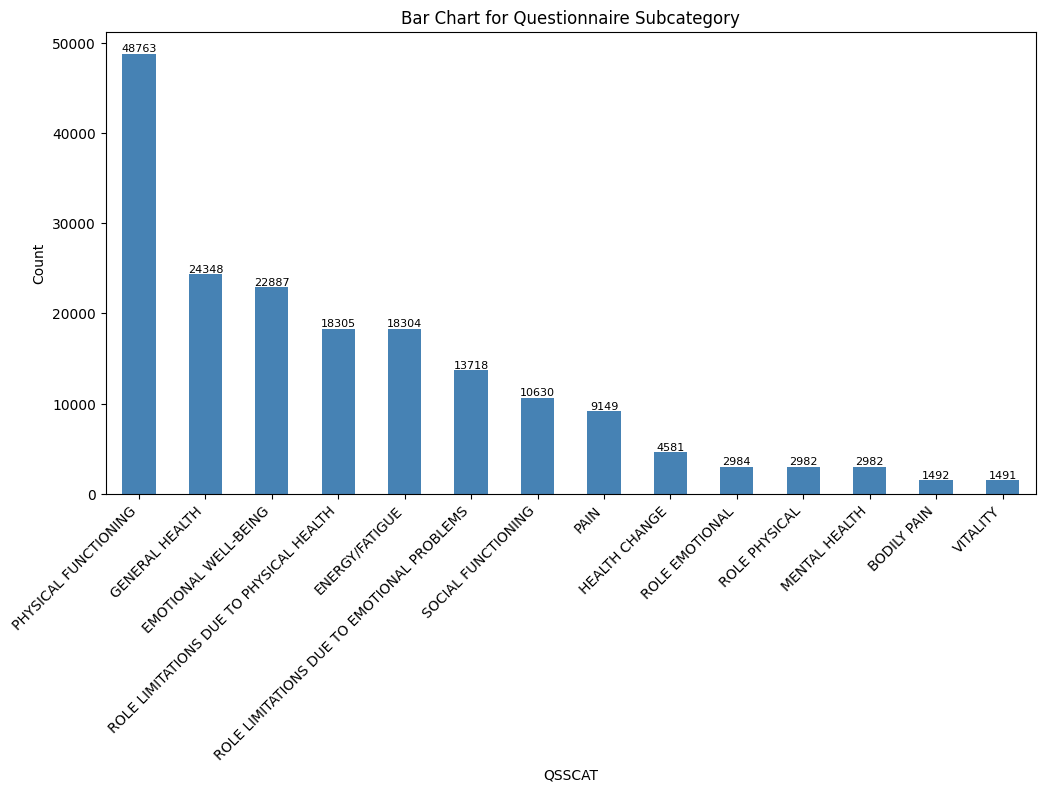

In [264]:
plt.figure(figsize=(12, 6))
ax = qs['QSSCAT'].value_counts().plot(kind='bar', color='steelblue')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), str(int(p.get_height())), ha='center', va='bottom', fontsize=8)

plt.xlabel('QSSCAT')
plt.ylabel('Count')
plt.title('Bar Chart for Questionnaire Subcategory')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

- Number of observations for each QSSTRESC (Character Result/Finding in Std Format) category

- Number of observations for each VISIT (Visit Name) category 

In [265]:
VISIT_counts = qs['VISIT'].value_counts().reset_index()
VISIT_counts.columns = ['VISIT', 'Count']
VISIT_counts

,VISIT,Count
0,BASELINE,39162
1,WEEK 24,32337
2,WEEK 12,22797
3,DAY 1,20853
4,MONTH 12,14275
...,...,...
105,VISIT8A MTH 6,32
106,END OF TREATMENT,22
107,MONTH 48,16
108,RELAPSE VISIT 5,16


- Number of observations for each QSEVLINT (Evaluation Interval) category 

In [266]:
QSEVLINT_counts = qs['QSEVLINT'].value_counts().reset_index()
QSEVLINT_counts.columns = ['QSEVLINT', 'Count']
QSEVLINT_counts

,QSEVLINT,Count
0,-P4W,104924
1,-P2W,49403


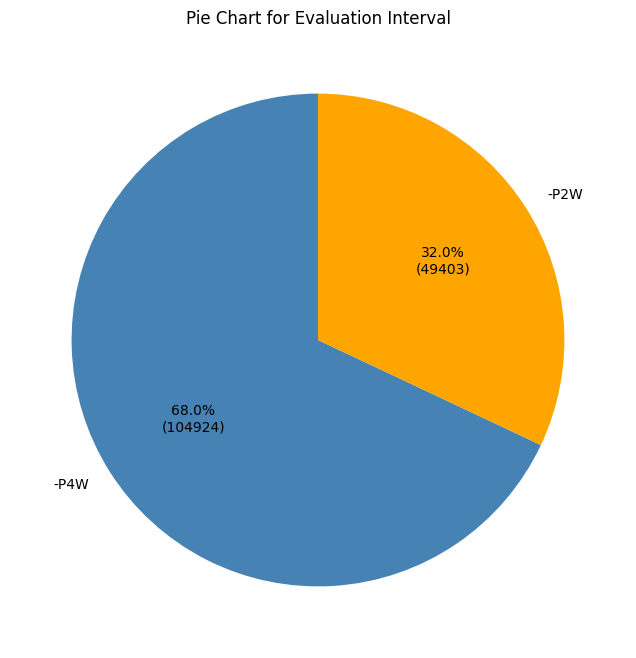

In [267]:
QSEVLINT_counts = qs['QSEVLINT'].dropna().value_counts()

plt.figure(figsize=(8, 8))
plt.pie(QSEVLINT_counts, labels=QSEVLINT_counts.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(QSEVLINT_counts) / 100), startangle=90, colors=['steelblue', 'orange', 'green', 'red', 'purple'])
plt.title('Pie Chart for Evaluation Interval')
plt.show()

alleen BDI total score is numeriek, fix mistakes (bv EDSS van 3.6, inspect all graphs)

### Create a static dataframe

In [268]:
QSDY.describe()

count    339368.000000
mean        331.487830
std         315.596324
min       -2220.000000
25%          84.000000
50%         253.000000
75%         563.000000
max        1404.000000
Name: QSDY, dtype: float64

In [269]:
missing_percentages = qs.groupby('QSCAT')['QSDY'].apply(lambda x: (x.isnull().sum() / len(x)) * 100)
print("Missing percentage of study day for each outcome category:")
print(missing_percentages.round(2))

Missing percentage of study day for each outcome category:
QSCAT
BDI-II           0.00
EDSS            41.14
KFSS            51.98
RAND-36 V1.0     0.53
SF-12 V2         0.00
Name: QSDY, dtype: float64


#### BDI-II

In [270]:
BDI_rows = qs[qs['QSCAT'] == 'BDI-II']
BDI_rows['QSDY'].describe()

count    51756.000000
mean       145.552245
std        172.236740
min       -128.000000
25%          1.000000
50%         86.000000
75%        170.000000
max        736.000000
Name: QSDY, dtype: float64

In [271]:
# Check the number of unique OEDY values
unique_qsdy_values = BDI_rows['QSDY'].nunique()
print("Number of unique QSDY values when QSCAT is 'BDI-II':", unique_qsdy_values)

Number of unique QSDY values when QSCAT is 'BDI-II': 199


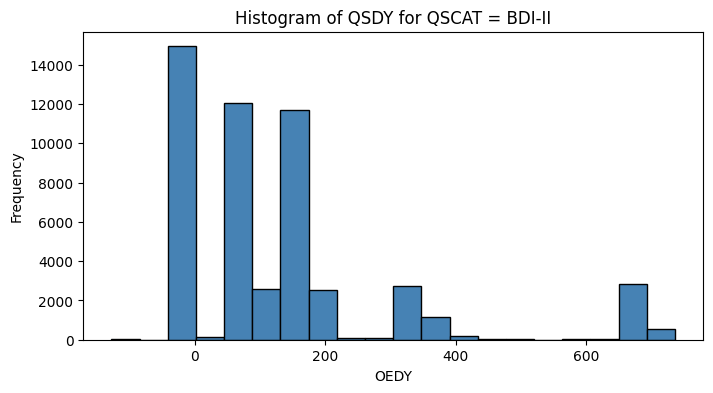

In [272]:
plt.figure(figsize=(8, 4))
plt.hist(BDI_rows['QSDY'], bins=20, color='steelblue', edgecolor='black')
plt.xlabel('OEDY')
plt.ylabel('Frequency')
plt.title('Histogram of QSDY for QSCAT = BDI-II')
plt.show()

**!! QSORRES contains the explanation of the QSTEST so keep for now maybe but don't end up using it also tell Sofia she should be using QSSTRESC/QSSTRESN instead**

In [273]:
BDI_rows.head(44)

,USUBJID,QSSEQ,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESC,QSSTRESN,VISITNUM,VISIT,QSDY,QSEVLINT
90,MSOAC/0024,9,BDI01-Sadness,BDI-II,NaN,I do not feel sad.,0,0.0,0.0,BASELINE,1.0,-P2W
91,MSOAC/0024,10,BDI01-Pessimism,BDI-II,NaN,I am not discouraged about my future.,0,0.0,0.0,BASELINE,1.0,-P2W
92,MSOAC/0024,11,BDI01-Past Failure,BDI-II,NaN,I do not feel like a failure.,0,0.0,0.0,BASELINE,1.0,-P2W
93,MSOAC/0024,12,BDI01-Loss of Pleasure,BDI-II,NaN,I get as much pleasure as I ever did from the ...,0,0.0,0.0,BASELINE,1.0,-P2W
94,MSOAC/0024,13,BDI01-Guilty Feelings,BDI-II,NaN,I don't feel particularly guilty.,0,0.0,0.0,BASELINE,1.0,-P2W
95,MSOAC/0024,14,BDI01-Punishment Feelings,BDI-II,NaN,I don't feel I am being punished.,0,0.0,0.0,BASELINE,1.0,-P2W
96,MSOAC/0024,15,BDI01-Self-Dislike,BDI-II,NaN,I feel the same about myself as ever.,0,0.0,0.0,BASELINE,1.0,-P2W
97,MSOAC/0024,16,BDI01-Self-Criticalness,BDI-II,NaN,I don't criticize or blame myself more than us...,0,0.0,0.0,BASELINE,1.0,-P2W
98,MSOAC/0024,17,BDI01-Suicidal Thoughts or Wishes,BDI-II,NaN,I don't have any thoughts of killing myself.,0,0.0,0.0,BASELINE,1.0,-P2W
99,MSOAC/0024,18,BDI01-Crying,BDI-II,NaN,I don't cry anymore than I used to.,0,0.0,0.0,BASELINE,1.0,-P2W


there seem to usually be 22 rows for each patient at a certain date (because the test consists of 21 items & we also have a row for the total score)

each item is rated from 0 to 3 so max score would be 3*21=63

In [274]:
result_table = BDI_rows.groupby(['USUBJID', 'QSDY']).size().reset_index(name='Count')
result_table

,USUBJID,QSDY,Count
0,MSOAC/0024,1.0,22
1,MSOAC/0024,95.0,22
2,MSOAC/0024,179.0,22
3,MSOAC/0024,340.0,22
4,MSOAC/0024,667.0,22
...,...,...,...
2354,MSOAC/9985,338.0,22
2355,MSOAC/9985,668.0,22
2356,MSOAC/9986,1.0,22
2357,MSOAC/9986,85.0,22


In [275]:
# check where it's not 22
filtered_result_table = result_table[result_table['Count'] != 22]
filtered_result_table

,USUBJID,QSDY,Count
11,MSOAC/0057,1.0,20
28,MSOAC/0111,1.0,21
30,MSOAC/0111,116.0,1
32,MSOAC/0111,345.0,21
44,MSOAC/0149,1.0,11
...,...,...,...
2254,MSOAC/9641,1.0,24
2292,MSOAC/9718,680.0,11
2293,MSOAC/9727,1.0,10
2307,MSOAC/9764,1.0,26


The problem is that not for all patients at all times u have all 22 answers, so we should take that into account (map it to a similar scale)

In [276]:
merged_df = pd.merge(filtered_result_table[['USUBJID', 'QSDY']], BDI_rows, on=['USUBJID', 'QSDY'], how='inner')
merged_df.head(43)


,USUBJID,QSDY,QSSEQ,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESC,QSSTRESN,VISITNUM,VISIT,QSEVLINT
0,MSOAC/0057,1.0,9,BDI01-Sadness,BDI-II,NaN,I do not feel sad.,0,0.0,0.0,BASELINE,-P2W
1,MSOAC/0057,1.0,10,BDI01-Pessimism,BDI-II,NaN,I am not discouraged about my future.,0,0.0,0.0,BASELINE,-P2W
2,MSOAC/0057,1.0,11,BDI01-Past Failure,BDI-II,NaN,I do not feel like a failure.,0,0.0,0.0,BASELINE,-P2W
3,MSOAC/0057,1.0,12,BDI01-Loss of Pleasure,BDI-II,NaN,I don't enjoy things as much as I used to.,1,1.0,0.0,BASELINE,-P2W
4,MSOAC/0057,1.0,13,BDI01-Punishment Feelings,BDI-II,NaN,I don't feel I am being punished.,0,0.0,0.0,BASELINE,-P2W
5,MSOAC/0057,1.0,14,BDI01-Self-Dislike,BDI-II,NaN,I have lost confidence in myself.,1,1.0,0.0,BASELINE,-P2W
6,MSOAC/0057,1.0,15,BDI01-Self-Criticalness,BDI-II,NaN,I am more critical of myself than I used to be.,1,1.0,0.0,BASELINE,-P2W
7,MSOAC/0057,1.0,16,BDI01-Crying,BDI-II,NaN,I don't cry anymore than I used to.,0,0.0,0.0,BASELINE,-P2W
8,MSOAC/0057,1.0,17,BDI01-Agitation,BDI-II,NaN,I am no more restless or wound up than usual.,0,0.0,0.0,BASELINE,-P2W
9,MSOAC/0057,1.0,18,BDI01-Loss of Interest,BDI-II,NaN,I am less interested in other people or things...,1,1.0,0.0,BASELINE,-P2W


only look at the rows with the Total BDI score

In [277]:
columns_to_drop = ['QSSEQ', 'QSSCAT', 'QSORRES', 'QSSTRESC', 'VISITNUM', 'QSEVLINT']
BDI_rows = BDI_rows[BDI_rows['QSTEST'] == 'BDI01-BDI Total Score'].drop(columns=columns_to_drop)
BDI_rows

,USUBJID,QSTEST,QSCAT,QSSTRESN,VISIT,QSDY
111,MSOAC/0024,BDI01-BDI Total Score,BDI-II,2.0,BASELINE,1.0
162960,MSOAC/0024,BDI01-BDI Total Score,BDI-II,2.0,MONTH3,95.0
185672,MSOAC/0024,BDI01-BDI Total Score,BDI-II,1.0,MONTH6,179.0
90417,MSOAC/0024,BDI01-BDI Total Score,BDI-II,3.0,MONTH12,340.0
138367,MSOAC/0024,BDI01-BDI Total Score,BDI-II,1.0,MONTH24,667.0
...,...,...,...,...,...,...
100887,MSOAC/9985,BDI01-BDI Total Score,BDI-II,1.0,MONTH12,338.0
148129,MSOAC/9985,BDI01-BDI Total Score,BDI-II,4.0,MONTH24,668.0
72744,MSOAC/9986,BDI01-BDI Total Score,BDI-II,3.0,DAY 1,1.0
377758,MSOAC/9986,BDI01-BDI Total Score,BDI-II,4.0,WEEK 12,85.0


In [278]:
BDI_rows['QSSTRESN'].describe()

count    2353.000000
mean       10.285168
std         9.230321
min         0.000000
25%         3.000000
50%         8.000000
75%        15.000000
max        52.000000
Name: QSSTRESN, dtype: float64

Rename DAY 1 to BASELINE, WEEK 12 to MONTH3, WEEK 24 to MONTH6, WEEK 48 to MONTH12

In [279]:
# Replace values in the 'visit' column
BDI_rows['VISIT'] = BDI_rows['VISIT'].replace({
    'DAY 1': 'BASELINE',
    'WEEK 12': 'MONTH3',
    'WEEK 24': 'MONTH6',
    'WEEK 48': 'MONTH12'
})

unique_visit_values = BDI_rows['VISIT'].unique()
print(unique_visit_values)

['BASELINE' 'MONTH3' 'MONTH6' 'MONTH12' 'MONTH24' 'EARLY WITHDRAWAL'
 'MONTH15' 'MES VISIT 3' 'MONTH9' 'MONTH18' 'END OF TREATMENT']


In [280]:
end_of_treatment_rows = BDI_rows[BDI_rows['VISIT'] == 'END OF TREATMENT']

# Extract 'USUBJID' values from mes_visit_3_rows
usubjid_values = end_of_treatment_rows['USUBJID'].unique()

# Filter BDI_rows for the selected 'USUBJID' values
selected_patients_rows = BDI_rows[BDI_rows['USUBJID'].isin(usubjid_values)]
selected_patients_rows

,USUBJID,QSTEST,QSCAT,QSSTRESN,VISIT,QSDY
23659,MSOAC/6049,BDI01-BDI Total Score,BDI-II,5.0,BASELINE,1.0
165978,MSOAC/6049,BDI01-BDI Total Score,BDI-II,2.0,MONTH3,92.0
89052,MSOAC/6049,BDI01-BDI Total Score,BDI-II,5.0,END OF TREATMENT,113.0


Hier moet ik iets mee doen, die verwijderen of samen tellen bij maand 3

In [281]:
early_withdrawal_rows = BDI_rows[BDI_rows['VISIT'] == 'EARLY WITHDRAWAL']

# Extract 'USUBJID' values from mes_visit_3_rows
usubjid_values = early_withdrawal_rows['USUBJID'].unique()

# Filter BDI_rows for the selected 'USUBJID' values
selected_patients_rows = BDI_rows[BDI_rows['USUBJID'].isin(usubjid_values)]
selected_patients_rows

,USUBJID,QSTEST,QSCAT,QSSTRESN,VISIT,QSDY
52079,MSOAC/0063,BDI01-BDI Total Score,BDI-II,12.0,BASELINE,1.0
85020,MSOAC/0063,BDI01-BDI Total Score,BDI-II,15.0,EARLY WITHDRAWAL,59.0
53002,MSOAC/0432,BDI01-BDI Total Score,BDI-II,4.0,BASELINE,1.0
356154,MSOAC/0432,BDI01-BDI Total Score,BDI-II,6.0,MONTH3,85.0
390654,MSOAC/0432,BDI01-BDI Total Score,BDI-II,3.0,MONTH6,169.0
85062,MSOAC/0432,BDI01-BDI Total Score,BDI-II,3.0,EARLY WITHDRAWAL,281.0
53630,MSOAC/0650,BDI01-BDI Total Score,BDI-II,23.0,BASELINE,1.0
356857,MSOAC/0650,BDI01-BDI Total Score,BDI-II,25.0,MONTH3,85.0
391689,MSOAC/0650,BDI01-BDI Total Score,BDI-II,19.0,MONTH6,169.0
85104,MSOAC/0650,BDI01-BDI Total Score,BDI-II,23.0,EARLY WITHDRAWAL,253.0


Ook hier ofwel veranderen naar MONTHX ofwel mogelijks verwijderen als het al na een maandje is?

In [282]:
mes_visit_3_rows = BDI_rows[BDI_rows['VISIT'] == 'MES VISIT 3']

# Extract 'USUBJID' values from mes_visit_3_rows
usubjid_values = mes_visit_3_rows['USUBJID'].unique()

# Filter BDI_rows for the selected 'USUBJID' values
selected_patients_rows = BDI_rows[BDI_rows['USUBJID'].isin(usubjid_values)]
selected_patients_rows

,USUBJID,QSTEST,QSCAT,QSSTRESN,VISIT,QSDY
53630,MSOAC/0650,BDI01-BDI Total Score,BDI-II,23.0,BASELINE,1.0
356857,MSOAC/0650,BDI01-BDI Total Score,BDI-II,25.0,MONTH3,85.0
391689,MSOAC/0650,BDI01-BDI Total Score,BDI-II,19.0,MONTH6,169.0
85104,MSOAC/0650,BDI01-BDI Total Score,BDI-II,23.0,EARLY WITHDRAWAL,253.0
90099,MSOAC/0650,BDI01-BDI Total Score,BDI-II,17.0,MES VISIT 3,414.0
57969,MSOAC/2792,BDI01-BDI Total Score,BDI-II,11.0,BASELINE,1.0
361470,MSOAC/2792,BDI01-BDI Total Score,BDI-II,5.0,MONTH3,85.0
397681,MSOAC/2792,BDI01-BDI Total Score,BDI-II,15.0,MONTH6,169.0
90141,MSOAC/2792,BDI01-BDI Total Score,BDI-II,16.0,MES VISIT 3,409.0
68123,MSOAC/7728,BDI01-BDI Total Score,BDI-II,15.0,BASELINE,1.0


How many rows do you have for each patient is between 1 and 6.

In [283]:
min_max_measurements = BDI_rows.groupby('USUBJID').size().agg(['min', 'max'])
print(min_max_measurements)

min    1
max    6
dtype: int64


Rename DAY 1 to BASELINE, WEEK 12 to MONTH3, WEEK 24 to MONTH6, WEEK 48 to MONTH12

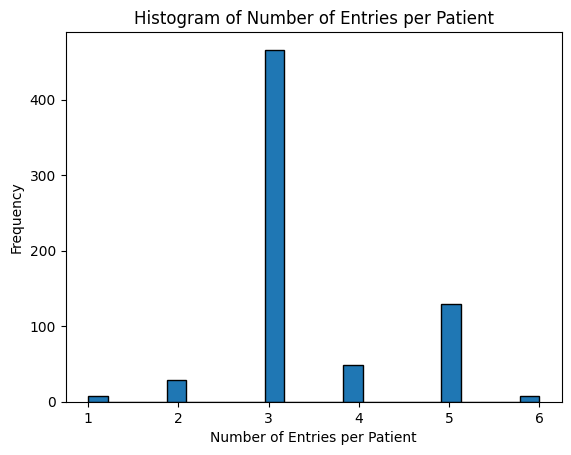

In [284]:
# Grouping by 'USUBJID' and counting the number of entries for each patient
patient_entries_count = BDI_rows.groupby('USUBJID').size()

# Creating a histogram
plt.hist(patient_entries_count, bins='auto', edgecolor='black')
plt.xlabel('Number of Entries per Patient')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Entries per Patient')
plt.show()

In [285]:
patient_entries_count = BDI_rows.groupby('USUBJID').size().reset_index(name='Number_of_Entries')

# Grouping by 'Number_of_Entries' and counting the number of patients for each count of entries
entries_distribution = patient_entries_count.groupby('Number_of_Entries').size().reset_index(name='Number_of_Patients')
entries_distribution

,Number_of_Entries,Number_of_Patients
0,1,7
1,2,29
2,3,466
3,4,48
4,5,130
5,6,8


In [286]:
patients_with_six_entries = BDI_rows.groupby('USUBJID').filter(lambda x: len(x) == 6)
patients_with_six_entries

,USUBJID,QSTEST,QSCAT,QSSTRESN,VISIT,QSDY
969,MSOAC/0216,BDI01-BDI Total Score,BDI-II,7.0,BASELINE,1.0
163089,MSOAC/0216,BDI01-BDI Total Score,BDI-II,4.0,MONTH3,96.0
185778,MSOAC/0216,BDI01-BDI Total Score,BDI-II,6.0,MONTH6,178.0
90651,MSOAC/0216,BDI01-BDI Total Score,BDI-II,6.0,MONTH12,347.0
115358,MSOAC/0216,BDI01-BDI Total Score,BDI-II,10.0,MONTH15,430.0
138524,MSOAC/0216,BDI01-BDI Total Score,BDI-II,11.0,MONTH24,670.0
10228,MSOAC/2714,BDI01-BDI Total Score,BDI-II,10.0,BASELINE,1.0
164191,MSOAC/2714,BDI01-BDI Total Score,BDI-II,8.0,MONTH3,102.0
186895,MSOAC/2714,BDI01-BDI Total Score,BDI-II,5.0,MONTH6,158.0
196529,MSOAC/2714,BDI01-BDI Total Score,BDI-II,4.0,MONTH9,288.0


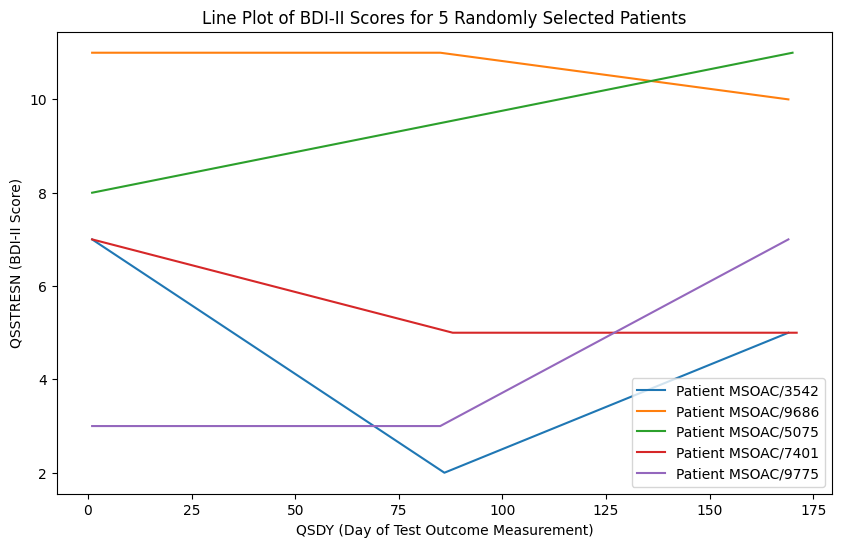

In [287]:
# Select a few random USUBJID values
random_usubjid_values = np.random.choice(BDI_rows['USUBJID'].unique(), size=5, replace=False)

# Filter BDI_rows for the selected USUBJID values
selected_patients_data = BDI_rows[BDI_rows['USUBJID'].isin(random_usubjid_values)]

# Create a line plot for each selected patient
plt.figure(figsize=(10, 6))
for usubjid in random_usubjid_values:
    patient_data = selected_patients_data[selected_patients_data['USUBJID'] == usubjid]
    plt.plot(patient_data['QSDY'], patient_data['QSSTRESN'], label=f'Patient {usubjid}')

# Set labels and title
plt.xlabel('QSDY (Day of Test Outcome Measurement)')
plt.ylabel('QSSTRESN (BDI-II Score)')
plt.title('Line Plot of BDI-II Scores for 5 Randomly Selected Patients')
plt.legend()
plt.show()

Ideas
- not always all 21 items recorded (sometimes more? how is that even possible? see more in detail) --> normalize or map to some kind of similar scale 
- clean up the VISIT column so that I can use this as 8 separate time stamps: BASELINE - 3M - 6M - 9M - 12M - 15M - 18M - 24M
- either keep those 8 separate time stamps or divide into 3/4 time bins (e.g. BASELINE - 1ST YR - 2ND YR)
- turn into a static dataframe with 1 row per observation

#### EDSS

In [288]:
EDSS_rows = qs[qs['QSCAT'] == 'EDSS']
EDSS_rows['QSDY'].describe()

count    15471.000000
mean       325.069937
std        297.286138
min       -407.000000
25%         85.000000
50%        254.000000
75%        547.000000
max       1404.000000
Name: QSDY, dtype: float64

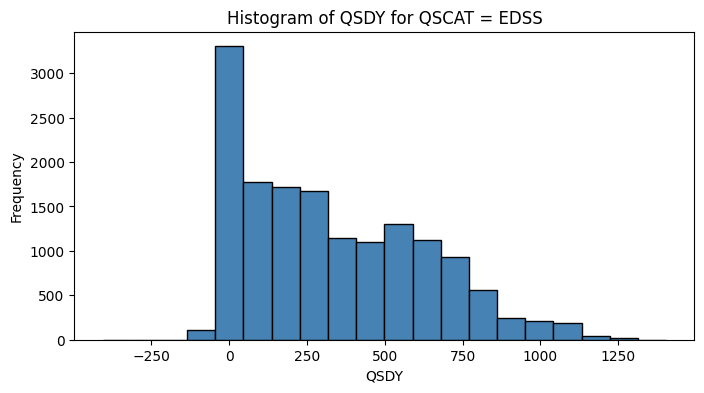

In [289]:
plt.figure(figsize=(8, 4))
plt.hist(EDSS_rows['QSDY'], bins=20, color='steelblue', edgecolor='black')
plt.xlabel('QSDY')
plt.ylabel('Frequency')
plt.title('Histogram of QSDY for QSCAT = EDSS')
plt.show()

In [290]:
# Assuming EDSS_rows is your DataFrame
unique_usubjid_count = EDSS_rows['USUBJID'].nunique()

print(f"The number of unique USUBJID in the EDSS_rows DataFrame is: {unique_usubjid_count}")

The number of unique USUBJID in the EDSS_rows DataFrame is: 2465


##### **Lose ~32% of patients by excluding the ones that dont have their time values recorded but there's not really a way around this I think**

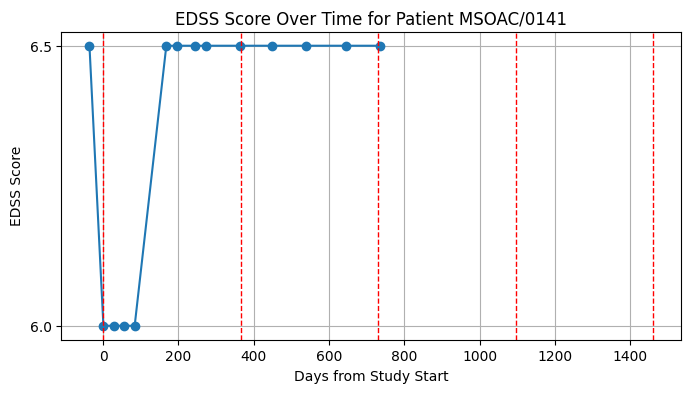

In [291]:
patient_id = 'MSOAC/0053'
patient_id = 'MSOAC/0076'
patient_id = 'MSOAC/0141'

# Filter the DataFrame for the specific patient
patient_data = EDSS_rows[EDSS_rows['USUBJID'] == patient_id]

# Plot the EDSS score over time
plt.figure(figsize=(8, 4))
plt.plot(patient_data['QSDY'], patient_data['QSSTRESN'], marker='o')
plt.title(f'EDSS Score Over Time for Patient {patient_id}')
plt.xlabel('Days from Study Start')
plt.ylabel('EDSS Score')
plt.grid(True)

# Set y-axis ticks in increments of 0.5, starting from the minimal value
min_value = patient_data['QSSTRESN'].min()
max_value = patient_data['QSSTRESN'].max()
plt.yticks([i * 0.5 for i in range(int(min_value * 2), int(max_value * 2) + 1)])

# Add vertical lines at specific QSDY values
vertical_lines = [0, 365, 730, 1095, 1460]
for line in vertical_lines:
    plt.axvline(x=line, color='r', linestyle='--', linewidth=1)
plt.show()

In [292]:
# Create subsets for different time periods
before_study_start = qs[qs['QSDY'] < 1]
two_years_after_start = qs[(qs['QSDY'] >= 1) & (qs['QSDY'] <= 730)]
four_years_after_start = qs[qs['QSDY'] > 730]

# Function to count observations for a given subset
def count_observations(subset, title):
    filtered_rows = subset[subset['QSCAT'] == 'EDSS']
    outcome_measure_counts = filtered_rows.groupby(['QSCAT', 'USUBJID']).size().reset_index(name='Observation_Count')
    
    print(f"\n{title}")
    return outcome_measure_counts.groupby('QSCAT')['Observation_Count'].describe()

# Apply the function for each time period
count_observations(before_study_start, 'Before Study Start')



Before Study Start


,count,mean,std,min,25%,50%,75%,max
QSCAT,,,,,,,,
EDSS,1689.0,1.033156,0.179096,1.0,1.0,1.0,1.0,2.0


In [293]:
count_observations(two_years_after_start, '2 Years After Study Start')


2 Years After Study Start


,count,mean,std,min,25%,50%,75%,max
QSCAT,,,,,,,,
EDSS,1622.0,7.413687,2.72143,1.0,5.0,9.0,9.0,18.0


In [294]:
count_observations(four_years_after_start, '4 Years After Study Start')


4 Years After Study Start


,count,mean,std,min,25%,50%,75%,max
QSCAT,,,,,,,,
EDSS,647.0,2.629057,1.363485,1.0,2.0,2.0,4.0,8.0


It doesn't seem to be a good grouping here (discard this, avg number of observations per patient is not relevant for time bin grouping they said!) - but I want to look at maximum EDSS score and not calculate a median or mean so maybe I just track the maximum EDSS each year?

**NOTE: we remove all the patients that don't have the time value because they would be put in a separate bin and that's messy so they told us for now to just remove that BUT KEEP IN MIND THAT THIS REMOVES LIKE HALF OF THE EDSS DATA!**

In [295]:
# Filter the DataFrame to include only the specified FTTEST values
EDSS_df = EDSS_rows.copy()  # Create a copy to avoid the warning

conditions = [
    (EDSS_df['QSDY'] <= 0),
    ((EDSS_df['QSDY'] > 0) & (EDSS_df['QSDY'] <= 365)),
    ((EDSS_df['QSDY'] > 365) & (EDSS_df['QSDY'] <= 730)),
    ((EDSS_df['QSDY'] > 730))
    #((EDSS_df['QSDY'] > 730) & (EDSS_df['QSDY'] <= 1095)),
    #((EDSS_df['QSDY'] > 1095) & (EDSS_df['QSDY'] <= 1460))  # maximal value is 1404
]

# Define corresponding values for each condition
values = ['before', '1y', '2y', 'after 2y']

# Create the new column "FT_PERIOD"
EDSS_df['QS_PERIOD'] = np.select(conditions, values, default='NaN')
EDSS_df = EDSS_df.dropna(subset=['QSDY']) #Drop observations for which we don't have time of test
EDSS_df.head()

,USUBJID,QSSEQ,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESC,QSSTRESN,VISITNUM,VISIT,QSDY,QSEVLINT,QS_PERIOD
205218,MSOAC/0016,1,EDSS01-Expanded Disability Score,EDSS,NaN,6,6,6.0,1.0,SCREENING,-21.0,NaN,before
214058,MSOAC/0019,1,EDSS01-Expanded Disability Score,EDSS,NaN,4,4,4.0,-3.0,SCREENING -3,-27.0,NaN,before
45,MSOAC/0019,10,EDSS01-Expanded Disability Score,EDSS,NaN,3.5,3.5,3.5,0.0,BASELINE,1.0,NaN,1y
168434,MSOAC/0019,55,EDSS01-Expanded Disability Score,EDSS,NaN,3.5,3.5,3.5,3.0,MONTH 3,93.0,NaN,1y
191059,MSOAC/0019,64,EDSS01-Expanded Disability Score,EDSS,NaN,3,3,3.0,6.0,MONTH 6,184.0,NaN,1y


In [296]:
grouped_df = EDSS_df.pivot_table(values='QSSTRESN', index='USUBJID', columns='QS_PERIOD', aggfunc='max', fill_value=None).reset_index()

# Rename the columns 
grouped_df.columns = ['USUBJID'] + [f"EDSS_{period}" for period in grouped_df.columns[1:]]

# Merge the new DataFrame with the original DataFrame on 'USUBJID'
result_EDSS = pd.merge(EDSS_df[['USUBJID']], grouped_df, on='USUBJID', how='left')

# Drop duplicate rows to keep only unique rows per patient and period
result_EDSS = result_EDSS.drop_duplicates(subset=['USUBJID'])
result_EDSS.head(20)

,USUBJID,EDSS_1y,EDSS_2y,EDSS_after 2y,EDSS_before
0,MSOAC/0016,NaN,NaN,NaN,6.0
1,MSOAC/0019,3.5,3.5,3.0,4.0
15,MSOAC/0024,4.0,4.0,NaN,4.0
25,MSOAC/0030,2.0,NaN,NaN,2.0
30,MSOAC/0031,1.5,1.0,1.5,1.0
44,MSOAC/0041,7.5,NaN,NaN,6.5
51,MSOAC/0046,4.5,NaN,NaN,2.5
57,MSOAC/0050,2.5,2.5,1.5,2.0
70,MSOAC/0053,7.5,8.0,8.0,6.5
79,MSOAC/0057,8.5,8.0,NaN,6.5


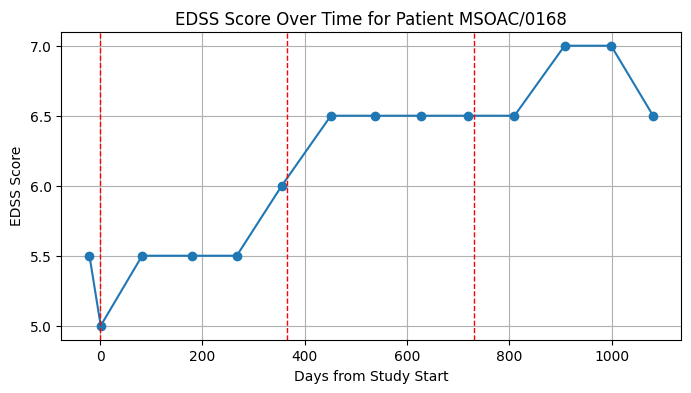

In [297]:
#patient_id = 'MSOAC/0053'
#patient_id = 'MSOAC/0076'
patient_id = 'MSOAC/0168'
#patient_id = 'MSOAC/9998'

# Filter the DataFrame for the specific patient
patient_data = EDSS_rows[EDSS_rows['USUBJID'] == patient_id]

# Plot the EDSS score over time
plt.figure(figsize=(8, 4))
plt.plot(patient_data['QSDY'], patient_data['QSSTRESN'], marker='o')
plt.title(f'EDSS Score Over Time for Patient {patient_id}')
plt.xlabel('Days from Study Start')
plt.ylabel('EDSS Score')
plt.grid(True)

# Set y-axis ticks in increments of 0.5, starting from the minimal value
min_value = patient_data['QSSTRESN'].min()
max_value = patient_data['QSSTRESN'].max()
plt.yticks([i * 0.5 for i in range(int(min_value * 2), int(max_value * 2) + 1)])

# Add vertical lines at specific QSDY values
vertical_lines = [0, 365, 730]
for line in vertical_lines:
    plt.axvline(x=line, color='r', linestyle='--', linewidth=1)
plt.show()

In [298]:
# Calculate the percentage of missing values for each column
missing_percentage = result_EDSS.isnull().mean() * 100

# Sort columns based on missing percentage in descending order
sorted_columns = missing_percentage.sort_values(ascending=False)

# Display the result
print("Percentage of missing values for each column in result_EDSS (sorted high to low):")
print(sorted_columns)

Percentage of missing values for each column in result_EDSS (sorted high to low):
EDSS_after 2y    61.761229
EDSS_2y          37.706856
EDSS_1y           4.137116
EDSS_before       0.177305
USUBJID           0.000000
dtype: float64


#### KFSS

In [299]:
KFSS_qs = qs[qs['QSCAT'] == 'KFSS']
KFSS_qs = KFSS_qs.drop(columns=['QSSEQ','VISITNUM','VISIT'])
KFSS_qs

,USUBJID,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESC,QSSTRESN,QSDY,QSEVLINT
216854,MSOAC/0014,KFSS1-Pyramidal Functions,KFSS,NaN,1,1,1.0,NaN,NaN
216855,MSOAC/0014,KFSS1-Cerebellar Functions,KFSS,NaN,0,0,0.0,NaN,NaN
216856,MSOAC/0014,KFSS1-Brain Stem Functions,KFSS,NaN,0,0,0.0,NaN,NaN
216857,MSOAC/0014,KFSS1-Sensory Functions,KFSS,NaN,0,0,0.0,NaN,NaN
216858,MSOAC/0014,KFSS1-Bowel and Bladder Functions,KFSS,NaN,0,0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
234423,MSOAC/9999,KFSS1-Brain Stem Functions,KFSS,NaN,2,2,2.0,NaN,NaN
234424,MSOAC/9999,KFSS1-Sensory Functions,KFSS,NaN,2,2,2.0,NaN,NaN
234425,MSOAC/9999,KFSS1-Bowel and Bladder Functions,KFSS,NaN,1,1,1.0,NaN,NaN
234426,MSOAC/9999,KFSS1-Visual or Optic Functions,KFSS,NaN,0,0,0.0,NaN,NaN


In [300]:
unique_usubjid_kfss_count = KFSS_qs['USUBJID'].nunique()
print("Number of unique values in USUBJID:", unique_usubjid_kfss_count)

Number of unique values in USUBJID: 2395


In [301]:
missing_percentage_kfss = (KFSS_qs.isnull().sum() / len(KFSS_qs)) * 100
missing_kfss = pd.DataFrame({'Column Name': missing_percentage_kfss.index, 'Missing Percentage': missing_percentage_kfss.values})
missing_kfss = missing_kfss.sort_values(by='Missing Percentage', ascending=False)
print(missing_kfss)

  Column Name  Missing Percentage
3      QSSCAT          100.000000
8    QSEVLINT          100.000000
7        QSDY           51.981897
6    QSSTRESN            0.636374
4     QSORRES            0.106239
5    QSSTRESC            0.106239
0     USUBJID            0.000000
1      QSTEST            0.000000
2       QSCAT            0.000000


In [302]:
KFSS_qs = KFSS_qs.drop(columns=['QSSCAT','QSEVLINT'])

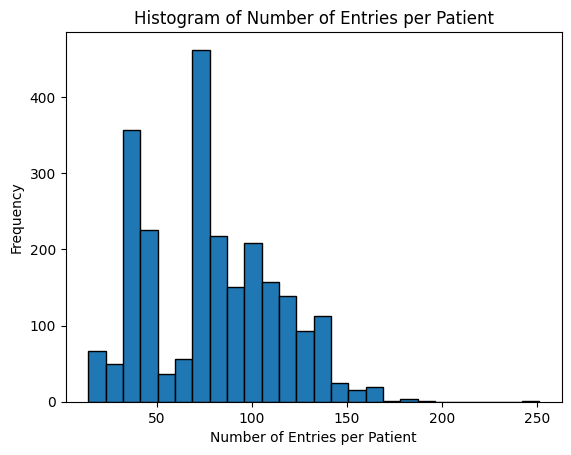

In [303]:
# Grouping by 'USUBJID' and counting the number of entries for each patient
patient_entries_count = KFSS_qs.groupby('USUBJID').size()

# Creating a histogram
plt.hist(patient_entries_count, bins='auto', edgecolor='black')
plt.xlabel('Number of Entries per Patient')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Entries per Patient')
plt.show()

In [304]:
KFSS_qs['QSDY'].describe()

count    90396.000000
mean       340.506693
std        311.477284
min       -127.000000
25%         85.000000
50%        254.000000
75%        587.000000
max       1404.000000
Name: QSDY, dtype: float64

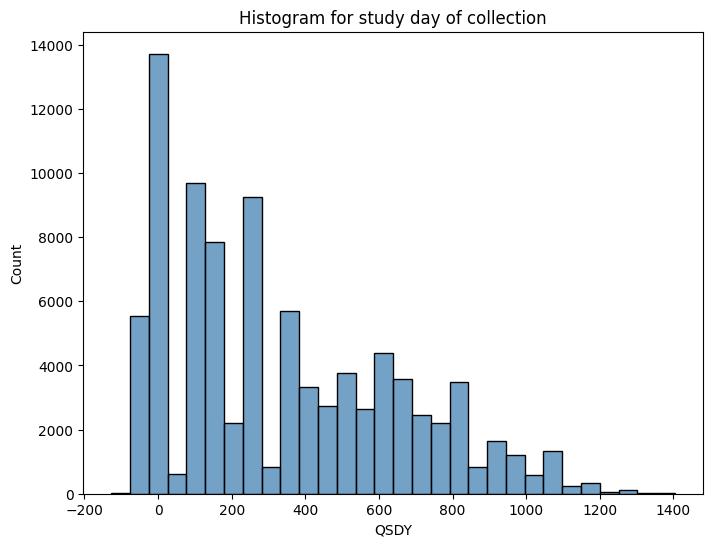

In [305]:
QSDY = KFSS_qs['QSDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(QSDY, kde=False, color='steelblue', bins=30)
plt.xlabel('QSDY')
plt.ylabel('Count')
plt.title('Histogram for study day of collection')
plt.show()

In [306]:
#p0019 = KFSS_qs[KFSS_qs['USUBJID'] == 'MSOAC/0014']
#p0019['QSDY'].unique()

In [307]:
pivot_table = KFSS_qs.pivot_table(index='QSTEST', columns='QSSTRESN', aggfunc='size', fill_value=0)

pivot_table

QSSTRESN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,9.0,99.0
QSTEST,,,,,,,,,
KFSS1-Bowel and Bladder Functions,11037,8226,4614,1824,430,58,15,0,0
KFSS1-Brain Stem Functions,14582,6465,3954,1087,120,1,0,0,0
KFSS1-Cerebellar Functions,8412,5185,6586,4680,1030,64,0,77,1
KFSS1-Cerebral or Mental Functions,15528,4363,5894,396,24,0,0,0,0
KFSS1-Other Functions,3235,567,0,0,0,0,0,0,0
KFSS1-Pyramidal Functions,3727,6140,5123,8727,2348,140,2,0,0
KFSS1-Sensory Functions,8899,5051,8056,3528,605,67,0,0,1
KFSS1-Visual or Optic Functions,13442,6739,4375,939,420,155,116,1,0


Note: some tests are on a scale 0-5 and others 0-6!!

Idea: 
- sum results of all tests per patient (and normalize)
- check change over time (?)
- 9 and 99 means missing (?)

#### RAND-36 V1.0

In [308]:
RAND36_qs = qs[qs['QSCAT'] == 'RAND-36 V1.0']
RAND36_qs = RAND36_qs.drop(columns=['QSSEQ','QSSTRESC','VISITNUM','VISIT'])
RAND36_qs

,USUBJID,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESN,QSDY,QSEVLINT
17,MSOAC/0019,R3601-Would You Say Your Health Is,RAND-36 V1.0,GENERAL HEALTH,3,3.0,1.0,NaN
22,MSOAC/0019,R3601-Health Now Compared to 1 Year Ago,RAND-36 V1.0,HEALTH CHANGE,4,4.0,1.0,NaN
25,MSOAC/0019,R3601-Health Limit Vigorous Activities,RAND-36 V1.0,PHYSICAL FUNCTIONING,1,1.0,1.0,NaN
26,MSOAC/0019,R3601-Health Limit Moderate Activities,RAND-36 V1.0,PHYSICAL FUNCTIONING,3,3.0,1.0,NaN
27,MSOAC/0019,R3601-Health Limit Carrying Groceries,RAND-36 V1.0,PHYSICAL FUNCTIONING,3,3.0,1.0,NaN
...,...,...,...,...,...,...,...,...
83481,MSOAC/9998,R3601-Amt Time Interfere Social Activity,RAND-36 V1.0,SOCIAL FUNCTIONING,3,3.0,1072.0,-P4W
83456,MSOAC/9998,R3601-Get Sick Easier Than Other People,RAND-36 V1.0,GENERAL HEALTH,3,3.0,1072.0,NaN
83457,MSOAC/9998,R3601-I Am as Healthy as Anybody I Know,RAND-36 V1.0,GENERAL HEALTH,3,3.0,1072.0,NaN
83458,MSOAC/9998,R3601-I Expect My Health to Get Worse,RAND-36 V1.0,GENERAL HEALTH,2,2.0,1072.0,NaN


In [309]:
unique_usubjid_rand36_count = RAND36_qs['USUBJID'].nunique()
print("Number of unique values in USUBJID:", unique_usubjid_rand36_count)

Number of unique values in USUBJID: 1064


In [310]:
missing_percentage_rand36 = (RAND36_qs.isnull().sum() / len(RAND36_qs)) * 100
missing_rand36 = pd.DataFrame({'Column Name': missing_percentage_rand36.index, 'Missing Percentage': missing_percentage_rand36.values})
missing_rand36 = missing_rand36.sort_values(by='Missing Percentage', ascending=False)
print(missing_rand36)

  Column Name  Missing Percentage
7    QSEVLINT           44.448627
4     QSORRES            1.169285
5    QSSTRESN            0.842663
6        QSDY            0.529396
3      QSSCAT            0.000607
0     USUBJID            0.000000
1      QSTEST            0.000000
2       QSCAT            0.000000


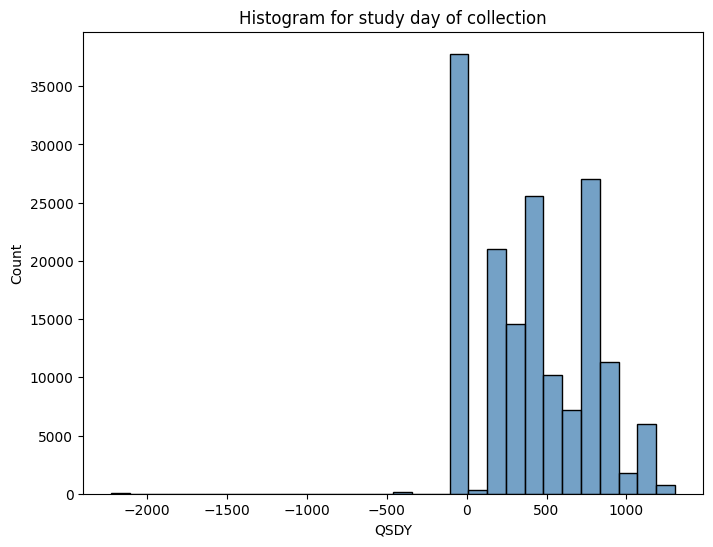

In [311]:
QSDY = RAND36_qs['QSDY'].dropna()

plt.figure(figsize=(8, 6))
sns.histplot(QSDY, kde=False, color='steelblue', bins=30)
plt.xlabel('QSDY')
plt.ylabel('Count')
plt.title('Histogram for study day of collection')
plt.show()

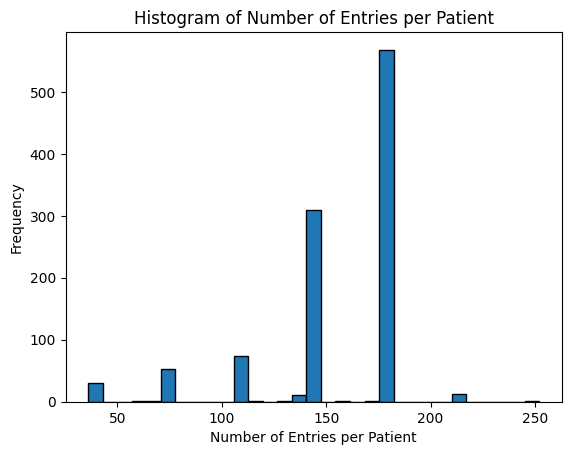

In [312]:
# Grouping by 'USUBJID' and counting the number of entries for each patient
patient_entries_count = RAND36_qs.groupby('USUBJID').size()

# Creating a histogram
plt.hist(patient_entries_count, bins='auto', edgecolor='black')
plt.xlabel('Number of Entries per Patient')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Entries per Patient')
plt.show()

Change plot cause in every QSDY a patient does all 36 questionnaires!!


In [313]:
# QSTEST
qsscat_counts_qs = RAND36_qs['QSTEST'].value_counts().reset_index()
qsscat_counts_qs.columns = ['QSTEST', 'Count']
total_count = qsscat_counts_qs['Count'].sum()
qsscat_counts_qs['Percentage'] = (qsscat_counts_qs['Count'] / total_count) * 100
qsscat_counts_qs

,QSTEST,Count,Percentage
0,R3601-Health Now Compared to 1 Year Ago,4581,2.781151
1,R3601-I Am as Healthy as Anybody I Know,4580,2.780543
2,R3601-Health Limit Climb Several Flights,4580,2.780543
3,R3601-Health Limit Walk Several Blocks,4580,2.780543
4,R3601-I Expect My Health to Get Worse,4579,2.779936
5,R3601-Have Felt So Down in the Dumps,4579,2.779936
6,R3601-Health Limit Vigorous Activities,4578,2.779329
7,R3601-Health Limit Moderate Activities,4578,2.779329
8,R3601-Health Limit Climb One Flight,4578,2.779329
9,R3601-Have Felt Downhearted and Blue,4578,2.779329


In [314]:
# QSSCAT
qsscat_counts_qs = RAND36_qs['QSSCAT'].value_counts().reset_index()
qsscat_counts_qs.columns = ['QSSCAT', 'Count']
total_count = qsscat_counts_qs['Count'].sum()
qsscat_counts_qs['Percentage'] = (qsscat_counts_qs['Count'] / total_count) * 100
qsscat_counts_qs

,QSSCAT,Count,Percentage
0,PHYSICAL FUNCTIONING,45777,27.791640
1,EMOTIONAL WELL-BEING,22887,13.894909
2,GENERAL HEALTH,22855,13.875482
3,ROLE LIMITATIONS DUE TO PHYSICAL HEALTH,18305,11.113135
4,ENERGY/FATIGUE,18304,11.112528
5,ROLE LIMITATIONS DUE TO EMOTIONAL PROBLEMS,13718,8.328325
6,PAIN,9149,5.554443
7,SOCIAL FUNCTIONING,9139,5.548371
8,HEALTH CHANGE,4581,2.781167


See scale for each category of questionnaire

In [315]:
# PHYSICAL FUNCTIONING
phys_funct = RAND36_qs[RAND36_qs['QSSCAT'] == 'PHYSICAL FUNCTIONING']

qsstresn_counts_qs = phys_funct['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,1.0,19542,42.958892
1,2.0,14507,31.890525
2,3.0,11441,25.150583


In [316]:
phys_funct_per_qsteet = phys_funct.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
phys_funct_per_qsteet = phys_funct_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
phys_funct_per_qsteet

,QSTEST,QSSTRESN,Count
2,R3601-Health Limit Bathing/Dressing Self,1.0,403
1,R3601-Health Limit Bathing/Dressing Self,2.0,1761
0,R3601-Health Limit Bathing/Dressing Self,3.0,2396
4,R3601-Health Limit Bending or Kneeling,1.0,1430
3,R3601-Health Limit Bending or Kneeling,2.0,1929
5,R3601-Health Limit Bending or Kneeling,3.0,1189
7,R3601-Health Limit Carrying Groceries,1.0,1608
6,R3601-Health Limit Carrying Groceries,2.0,1814
8,R3601-Health Limit Carrying Groceries,3.0,1122
11,R3601-Health Limit Climb One Flight,1.0,1161


In [317]:
# EMOTIONAL WELL-BEING
emotion = RAND36_qs[RAND36_qs['QSSCAT'] == 'EMOTIONAL WELL-BEING']

qsstresn_counts_qs = emotion['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,6.0,5702,25.132228
1,5.0,4982,21.958745
2,4.0,4566,20.125176
3,2.0,3588,15.814528
4,3.0,2815,12.407440
5,1.0,1035,4.561883


In [318]:
emotion_per_qsteet = emotion.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
emotion_per_qsteet = emotion_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
emotion_per_qsteet

,QSTEST,QSSTRESN,Count
5,R3601-Have Been a Very Nervous Person,1.0,73
4,R3601-Have Been a Very Nervous Person,2.0,174
3,R3601-Have Been a Very Nervous Person,3.0,387
2,R3601-Have Been a Very Nervous Person,4.0,1002
1,R3601-Have Been a Very Nervous Person,5.0,1325
0,R3601-Have Been a Very Nervous Person,6.0,1583
11,R3601-Have Felt Downhearted and Blue,1.0,62
10,R3601-Have Felt Downhearted and Blue,2.0,176
9,R3601-Have Felt Downhearted and Blue,3.0,361
8,R3601-Have Felt Downhearted and Blue,4.0,970


In [319]:
# GENERAL HEALTH
gen_health = RAND36_qs[RAND36_qs['QSSCAT'] == 'GENERAL HEALTH']

qsstresn_counts_qs = gen_health['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,3.0,5681,25.131608
1,2.0,5303,23.459412
2,4.0,5278,23.348817
3,5.0,4353,19.256802
4,1.0,1990,8.803362


In [320]:
gen_health_per_qsteet = gen_health.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
gen_health_per_qsteet = gen_health_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
gen_health_per_qsteet

,QSTEST,QSSTRESN,Count
4,R3601-Get Sick Easier Than Other People,1.0,159
3,R3601-Get Sick Easier Than Other People,2.0,473
2,R3601-Get Sick Easier Than Other People,3.0,808
1,R3601-Get Sick Easier Than Other People,4.0,1416
0,R3601-Get Sick Easier Than Other People,5.0,1673
9,R3601-I Am as Healthy as Anybody I Know,1.0,684
5,R3601-I Am as Healthy as Anybody I Know,2.0,1417
8,R3601-I Am as Healthy as Anybody I Know,3.0,689
6,R3601-I Am as Healthy as Anybody I Know,4.0,983
7,R3601-I Am as Healthy as Anybody I Know,5.0,757


In [321]:
# ROLE LIMITATIONS DUE TO PHYSICAL HEALTH
phys_health = RAND36_qs[RAND36_qs['QSSCAT'] == 'ROLE LIMITATIONS DUE TO PHYSICAL HEALTH']

qsstresn_counts_qs = phys_health['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,1.0,10799,59.495345
1,2.0,7352,40.504655


In [322]:
phys_health_per_qsteet = phys_health.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
phys_health_per_qsteet = phys_health_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
phys_health_per_qsteet

,QSTEST,QSSTRESN,Count
0,R3601-Phys Health: Accomplish Less,1.0,2934
1,R3601-Phys Health: Accomplish Less,2.0,1598
3,R3601-Phys Health: Cut Work Time,1.0,2142
2,R3601-Phys Health: Cut Work Time,2.0,2389
4,R3601-Phys Health: Difficulty Performing,1.0,2855
5,R3601-Phys Health: Difficulty Performing,2.0,1690
6,R3601-Phys Health: Limit Kind of Work,1.0,2868
7,R3601-Phys Health: Limit Kind of Work,2.0,1675


In [323]:
# ENERGY/FATIGUE
energy_fatigue = RAND36_qs[RAND36_qs['QSSCAT'] == 'ENERGY/FATIGUE']

qsstresn_counts_qs = energy_fatigue['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,4.0,5011,27.610337
1,5.0,3875,21.351039
2,3.0,3447,18.992782
3,2.0,2744,15.119290
4,6.0,2077,11.444157
5,1.0,995,5.482396


In [324]:
energy_fatigue_per_qsteet = energy_fatigue.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
energy_fatigue_per_qsteet = energy_fatigue_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
energy_fatigue_per_qsteet

,QSTEST,QSSTRESN,Count
5,R3601-Did You Feel Full of Pep,1.0,163
3,R3601-Did You Feel Full of Pep,2.0,684
2,R3601-Did You Feel Full of Pep,3.0,762
0,R3601-Did You Feel Full of Pep,4.0,1257
1,R3601-Did You Feel Full of Pep,5.0,1040
4,R3601-Did You Feel Full of Pep,6.0,631
10,R3601-Did You Feel Tired,1.0,469
8,R3601-Did You Feel Tired,2.0,851
7,R3601-Did You Feel Tired,3.0,1085
6,R3601-Did You Feel Tired,4.0,1316


In [325]:
# ROLE LIMITATIONS DUE TO EMOTIONAL PROBLEMS
emotion_prob = RAND36_qs[RAND36_qs['QSSCAT'] == 'ROLE LIMITATIONS DUE TO EMOTIONAL PROBLEMS']

qsstresn_counts_qs = emotion_prob['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,2.0,8992,66.137099
1,1.0,4604,33.862901


In [326]:
emotion_prob_per_qsteet = emotion_prob.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
emotion_prob_per_qsteet = emotion_prob_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
emotion_prob_per_qsteet

,QSTEST,QSSTRESN,Count
1,R3601-Emotional Problem: Accomplish Less,1.0,1881
0,R3601-Emotional Problem: Accomplish Less,2.0,2656
3,R3601-Emotional Problem: Cut Work Time,1.0,1393
2,R3601-Emotional Problem: Cut Work Time,2.0,3142
5,R3601-Emotional Problem: Less Careful,1.0,1330
4,R3601-Emotional Problem: Less Careful,2.0,3194


In [327]:
# PAIN
pain = RAND36_qs[RAND36_qs['QSSCAT'] == 'PAIN']

qsstresn_counts_qs = pain['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,1.0,3224,35.494881
1,2.0,2027,22.316415
2,3.0,1703,18.749312
3,4.0,1630,17.945613
4,5.0,455,5.009358
5,6.0,44,0.484421


In [328]:
pain_per_qsteet = pain.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
pain_per_qsteet = pain_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
pain_per_qsteet

,QSTEST,QSSTRESN,Count
0,R3601-Did Pain Interfere With Your Work,1.0,1967
1,R3601-Did Pain Interfere With Your Work,2.0,1091
2,R3601-Did Pain Interfere With Your Work,3.0,899
3,R3601-Did Pain Interfere With Your Work,4.0,480
4,R3601-Did Pain Interfere With Your Work,5.0,98
5,R3601-How Much Bodily Pain Have You Had,1.0,1257
7,R3601-How Much Bodily Pain Have You Had,2.0,936
8,R3601-How Much Bodily Pain Have You Had,3.0,804
6,R3601-How Much Bodily Pain Have You Had,4.0,1150
9,R3601-How Much Bodily Pain Have You Had,5.0,357


In [329]:
# SOCIAL FUNCTIONING
social_funct = RAND36_qs[RAND36_qs['QSSCAT'] == 'SOCIAL FUNCTIONING']

qsstresn_counts_qs = social_funct['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,3.0,2301,25.509978
1,2.0,1836,20.354767
2,4.0,1776,19.689579
3,1.0,1602,17.760532
4,5.0,1505,16.685144


In [330]:
social_funct_per_qsteet = social_funct.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
social_funct_per_qsteet = social_funct_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
social_funct_per_qsteet

,QSTEST,QSSTRESN,Count
4,R3601-Amt Time Interfere Social Activity,1.0,150
3,R3601-Amt Time Interfere Social Activity,2.0,548
1,R3601-Amt Time Interfere Social Activity,3.0,1296
2,R3601-Amt Time Interfere Social Activity,4.0,1131
0,R3601-Amt Time Interfere Social Activity,5.0,1370
5,R3601-Extent Interfered Social Activity,1.0,1452
6,R3601-Extent Interfered Social Activity,2.0,1288
7,R3601-Extent Interfered Social Activity,3.0,1005
8,R3601-Extent Interfered Social Activity,4.0,645
9,R3601-Extent Interfered Social Activity,5.0,135


In [331]:
# HEALTH CHANGE
health_change = RAND36_qs[RAND36_qs['QSSCAT'] == 'HEALTH CHANGE']

qsstresn_counts_qs = health_change['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,3.0,2012,44.258689
1,4.0,1627,35.789705
2,2.0,465,10.228773
3,5.0,236,5.191377
4,1.0,206,4.531456


In [332]:
health_change_per_qsteet = health_change.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
health_change_per_qsteet = health_change_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
health_change_per_qsteet

,QSTEST,QSSTRESN,Count
4,R3601-Health Now Compared to 1 Year Ago,1.0,206
2,R3601-Health Now Compared to 1 Year Ago,2.0,465
0,R3601-Health Now Compared to 1 Year Ago,3.0,2012
1,R3601-Health Now Compared to 1 Year Ago,4.0,1627
3,R3601-Health Now Compared to 1 Year Ago,5.0,236


*Conclusion:* all questions per QSSCAT use the SAME likert-scale (except for PAIN) -- **Lennert: I think u mistyped because some differ?**

*Sofia*: what i mean is that in a category all use a 5 likert scale for example, or a 6 likert scale. But in pain, one uses 5 and other uses 6

In [333]:
#pivot_table = RAND36_qs.pivot_table(index='QSTEST', columns='QSSTRESN', values='QSORRES', aggfunc='first')
#grouped = RAND36_qs.groupby(['QSTEST', 'QSSTRESN'])['QSORRES'].apply(list).reset_index()
filtered = RAND36_qs[RAND36_qs['QSSCAT'] == 'PAIN']
grouped = filtered.groupby(['QSTEST', 'QSSTRESN'])['QSORRES'].agg(lambda x: list(set(x))).reset_index()
pivot_table = grouped.pivot_table(index='QSTEST', columns='QSSTRESN', values='QSORRES', aggfunc=lambda x: x[0] if isinstance(x, list) and len(x) == 1 else x)
pivot_table

QSSTRESN,1.0,2.0,3.0,4.0,5.0,6.0
QSTEST,,,,,,
R3601-Did Pain Interfere With Your Work,"[1, Not at all]","[A little bit, 2]","[Moderately, 3]","[4, Quite a bit]","[5, Extremely]",NaN
R3601-How Much Bodily Pain Have You Had,"[1, nan]","[Very Mild, 2, Very mild]","[3, Mild]","[Moderate, 4]","[Severe, 5]","[Very severe, Very Severe, 6]"


In [334]:
p0019 = RAND36_qs[RAND36_qs['USUBJID'] == 'MSOAC/4157']
#p0019 = p0019[p0019['QSTEST'] == 'R3601-I Expect My Health to Get Worse']
p0019['QSDY'].unique() 
#p0019

array([-14., 184., 359., 552., 728.])

In [335]:
negative_values = RAND36_qs[RAND36_qs['QSDY'] < 0]['USUBJID'].unique()

print(negative_values)

['MSOAC/0041' 'MSOAC/0053' 'MSOAC/0094' 'MSOAC/0102' 'MSOAC/0110'
 'MSOAC/0117' 'MSOAC/0141' 'MSOAC/0185' 'MSOAC/0186' 'MSOAC/0194'
 'MSOAC/0275' 'MSOAC/0295' 'MSOAC/0319' 'MSOAC/0332' 'MSOAC/0354'
 'MSOAC/0373' 'MSOAC/0378' 'MSOAC/0484' 'MSOAC/0578' 'MSOAC/0581'
 'MSOAC/0608' 'MSOAC/0665' 'MSOAC/0689' 'MSOAC/0736' 'MSOAC/0747'
 'MSOAC/0780' 'MSOAC/0804' 'MSOAC/0838' 'MSOAC/0844' 'MSOAC/0890'
 'MSOAC/1001' 'MSOAC/1010' 'MSOAC/1082' 'MSOAC/1163' 'MSOAC/1174'
 'MSOAC/1210' 'MSOAC/1213' 'MSOAC/1237' 'MSOAC/1255' 'MSOAC/1265'
 'MSOAC/1288' 'MSOAC/1408' 'MSOAC/1478' 'MSOAC/1518' 'MSOAC/1655'
 'MSOAC/1656' 'MSOAC/1672' 'MSOAC/1717' 'MSOAC/1723' 'MSOAC/1767'
 'MSOAC/1781' 'MSOAC/1799' 'MSOAC/1808' 'MSOAC/1832' 'MSOAC/1867'
 'MSOAC/1983' 'MSOAC/1993' 'MSOAC/2085' 'MSOAC/2121' 'MSOAC/2123'
 'MSOAC/2144' 'MSOAC/2149' 'MSOAC/2151' 'MSOAC/2158' 'MSOAC/2218'
 'MSOAC/2237' 'MSOAC/2317' 'MSOAC/2402' 'MSOAC/2463' 'MSOAC/2478'
 'MSOAC/2501' 'MSOAC/2534' 'MSOAC/2544' 'MSOAC/2548' 'MSOAC/2569'
 'MSOAC/26

#### SF-12 V2

In [336]:
SF_rows = qs[qs['QSCAT'] == 'SF-12 V2']

In [337]:
# Count unique values of USUBJID in each dataframe
unique_usubjid_sf = SF_rows['USUBJID'].nunique()
unique_usubjid_rand36 = RAND36_qs['USUBJID'].nunique()

# Overlapping between SF_rows and RAND36_qs
overlap_sf_rand36 = set(SF_rows['USUBJID']).intersection(RAND36_qs['USUBJID'])

print("Number of unique USUBJID in SF_rows:", unique_usubjid_sf)
print("Number of unique USUBJID in RAND36_qs:", unique_usubjid_rand36)
print("Number of overlapping USUBJID between SF_rows and RAND36_qs:", len(overlap_sf_rand36))

Number of unique USUBJID in SF_rows: 500
Number of unique USUBJID in RAND36_qs: 1064
Number of overlapping USUBJID between SF_rows and RAND36_qs: 0


In [338]:
SF_rows['QSDY'].describe()

count    17901.000000
mean        88.037540
std         75.181741
min         -7.000000
25%          1.000000
50%         85.000000
75%        169.000000
max        427.000000
Name: QSDY, dtype: float64

In [339]:
# Check the number of unique OEDY values
unique_qsdy_values = SF_rows['QSDY'].nunique()
print("Number of unique QSDY values when QSCAT is 'SF-12 V2':", unique_qsdy_values)

Number of unique QSDY values when QSCAT is 'SF-12 V2': 64


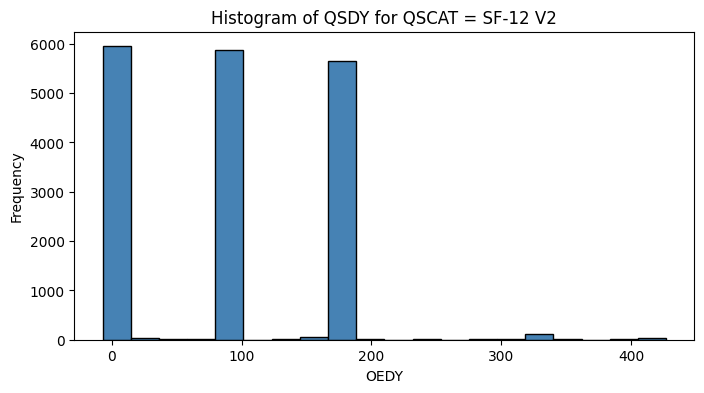

In [340]:
plt.figure(figsize=(8, 4))
plt.hist(SF_rows['QSDY'], bins=20, color='steelblue', edgecolor='black')
plt.xlabel('OEDY')
plt.ylabel('Frequency')
plt.title('Histogram of QSDY for QSCAT = SF-12 V2')
plt.show()

**CHECK QSORRES FOR INTERPRETATION/MEAN WHAT IS GOOD BAD ETC BUT QSSTRESN USE IN CALCULATIONS**

In [341]:
SF_rows.head(30)

,USUBJID,QSSEQ,QSTEST,QSCAT,QSSCAT,QSORRES,QSSTRESC,QSSTRESN,VISITNUM,VISIT,QSDY,QSEVLINT
51921,MSOAC/0030,39,SF121-Would You Say Your Health Is,SF-12 V2,GENERAL HEALTH,GOOD,3,3.0,20.0,DAY 1,1.0,NaN
51924,MSOAC/0030,40,SF121-Health Limit Moderate Activities,SF-12 V2,PHYSICAL FUNCTIONING,"NO, NOT LIMITED AT ALL",3,3.0,20.0,DAY 1,1.0,NaN
51925,MSOAC/0030,41,SF121-Health Limit Climb Several Flights,SF-12 V2,PHYSICAL FUNCTIONING,"YES, LIMITED A LITTLE",2,2.0,20.0,DAY 1,1.0,NaN
51928,MSOAC/0030,42,SF121-Phys Health: Accomplish Less,SF-12 V2,ROLE PHYSICAL,NONE OF THE TIME,5,5.0,20.0,DAY 1,1.0,-P4W
51929,MSOAC/0030,43,SF121-Phys Health: Limit Kind of Work,SF-12 V2,ROLE PHYSICAL,A LITTLE OF THE TIME,4,4.0,20.0,DAY 1,1.0,-P4W
51926,MSOAC/0030,44,SF121-Emotional Problem: Accomplish Less,SF-12 V2,ROLE EMOTIONAL,NONE OF THE TIME,5,5.0,20.0,DAY 1,1.0,-P4W
51927,MSOAC/0030,45,SF121-Emotional Problem: Less Careful,SF-12 V2,ROLE EMOTIONAL,NONE OF THE TIME,5,5.0,20.0,DAY 1,1.0,-P4W
51920,MSOAC/0030,46,SF121-Did Pain Interfere With Your Work,SF-12 V2,BODILY PAIN,NOT AT ALL,1,1.0,20.0,DAY 1,1.0,-P4W
51922,MSOAC/0030,47,SF121-Have You Felt Calm and Peaceful,SF-12 V2,MENTAL HEALTH,ALL OF THE TIME,1,1.0,20.0,DAY 1,1.0,-P4W
51931,MSOAC/0030,48,SF121-Did You Have a Lot of Energy,SF-12 V2,VITALITY,MOST OF THE TIME,2,2.0,20.0,DAY 1,1.0,-P4W


In [342]:
# QSTEST
qstest_counts_sf = SF_rows['QSTEST'].value_counts().reset_index()
qstest_counts_sf.columns = ['QSTEST', 'Count']
total_count = qstest_counts_sf['Count'].sum()
qstest_counts_sf['Percentage'] = (qstest_counts_sf['Count'] / total_count) * 100
qstest_counts_sf

,QSTEST,Count,Percentage
0,SF121-Would You Say Your Health Is,1493,8.340316
1,SF121-Health Limit Moderate Activities,1493,8.340316
2,SF121-Health Limit Climb Several Flights,1493,8.340316
3,SF121-Phys Health: Accomplish Less,1492,8.334730
4,SF121-Emotional Problem: Accomplish Less,1492,8.334730
5,SF121-Emotional Problem: Less Careful,1492,8.334730
6,SF121-Did Pain Interfere With Your Work,1492,8.334730
7,SF121-Have You Felt Calm and Peaceful,1491,8.329144
8,SF121-Did You Have a Lot of Energy,1491,8.329144
9,SF121-Have Felt Downhearted/Depressed,1491,8.329144


In [343]:
# QSSCAT
qsscat_counts_sf = SF_rows['QSSCAT'].value_counts().reset_index()
qsscat_counts_sf.columns = ['QSSCAT', 'Count']
total_count = qsscat_counts_sf['Count'].sum()
qsscat_counts_sf['Percentage'] = (qsscat_counts_sf['Count'] / total_count) * 100
qsscat_counts_sf

,QSSCAT,Count,Percentage
0,PHYSICAL FUNCTIONING,2986,16.680632
1,ROLE EMOTIONAL,2984,16.669460
2,ROLE PHYSICAL,2982,16.658287
3,MENTAL HEALTH,2982,16.658287
4,GENERAL HEALTH,1493,8.340316
5,BODILY PAIN,1492,8.334730
6,VITALITY,1491,8.329144
7,SOCIAL FUNCTIONING,1491,8.329144


See scale for each category of questionnaire

In [344]:
# PHYSICAL FUNCTIONING
phys_funct = SF_rows[SF_rows['QSSCAT'] == 'PHYSICAL FUNCTIONING']

qsstresn_counts_qs = phys_funct['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,2.0,1278,42.799732
1,3.0,1251,41.895512
2,1.0,457,15.304756


In [345]:
phys_funct_per_qsteet = phys_funct.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
phys_funct_per_qsteet = phys_funct_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
phys_funct_per_qsteet

,QSTEST,QSSTRESN,Count
2,SF121-Health Limit Climb Several Flights,1.0,273
0,SF121-Health Limit Climb Several Flights,2.0,643
1,SF121-Health Limit Climb Several Flights,3.0,577
5,SF121-Health Limit Moderate Activities,1.0,184
4,SF121-Health Limit Moderate Activities,2.0,635
3,SF121-Health Limit Moderate Activities,3.0,674


In [346]:
# ROLE EMOTIONAL
emotion_prob = SF_rows[SF_rows['QSSCAT'] == 'ROLE EMOTIONAL']

qsstresn_counts_qs = emotion_prob['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,5.0,1126,37.734584
1,4.0,807,27.044236
2,3.0,752,25.201072
3,2.0,237,7.942359
4,1.0,62,2.077748


In [347]:
emotion_prob_per_qsteet = emotion_prob.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
emotion_prob_per_qsteet = emotion_prob_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
emotion_prob_per_qsteet

,QSTEST,QSSTRESN,Count
4,SF121-Emotional Problem: Accomplish Less,1.0,34
3,SF121-Emotional Problem: Accomplish Less,2.0,137
1,SF121-Emotional Problem: Accomplish Less,3.0,385
2,SF121-Emotional Problem: Accomplish Less,4.0,384
0,SF121-Emotional Problem: Accomplish Less,5.0,552
9,SF121-Emotional Problem: Less Careful,1.0,28
8,SF121-Emotional Problem: Less Careful,2.0,100
7,SF121-Emotional Problem: Less Careful,3.0,367
6,SF121-Emotional Problem: Less Careful,4.0,423
5,SF121-Emotional Problem: Less Careful,5.0,574


In [348]:
# ROLE PHYSICAL
phys_prob = SF_rows[SF_rows['QSSCAT'] == 'ROLE PHYSICAL']

qsstresn_counts_qs = phys_prob['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,3.0,916,30.717639
1,5.0,857,28.739101
2,4.0,719,24.111335
3,2.0,365,12.240107
4,1.0,125,4.191818


In [349]:
phys_prob_per_qsteet = phys_prob.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
phys_prob_per_qsteet = phys_prob_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
phys_prob_per_qsteet

,QSTEST,QSSTRESN,Count
4,SF121-Phys Health: Accomplish Less,1.0,63
3,SF121-Phys Health: Accomplish Less,2.0,196
0,SF121-Phys Health: Accomplish Less,3.0,475
2,SF121-Phys Health: Accomplish Less,4.0,364
1,SF121-Phys Health: Accomplish Less,5.0,394
9,SF121-Phys Health: Limit Kind of Work,1.0,62
8,SF121-Phys Health: Limit Kind of Work,2.0,169
6,SF121-Phys Health: Limit Kind of Work,3.0,441
7,SF121-Phys Health: Limit Kind of Work,4.0,355
5,SF121-Phys Health: Limit Kind of Work,5.0,463


In [350]:
# MENTAL HEALTH
mental = SF_rows[SF_rows['QSSCAT'] == 'MENTAL HEALTH']

qsstresn_counts_qs = mental['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,2.0,832,27.900738
1,3.0,817,27.397720
2,4.0,610,20.456070
3,5.0,466,15.627096
4,1.0,257,8.618377


In [351]:
mental_per_qsteet = mental.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
mental_per_qsteet = mental_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
mental_per_qsteet

,QSTEST,QSSTRESN,Count
4,SF121-Have Felt Downhearted/Depressed,1.0,43
3,SF121-Have Felt Downhearted/Depressed,2.0,169
1,SF121-Have Felt Downhearted/Depressed,3.0,428
2,SF121-Have Felt Downhearted/Depressed,4.0,420
0,SF121-Have Felt Downhearted/Depressed,5.0,431
7,SF121-Have You Felt Calm and Peaceful,1.0,214
5,SF121-Have You Felt Calm and Peaceful,2.0,663
6,SF121-Have You Felt Calm and Peaceful,3.0,389
8,SF121-Have You Felt Calm and Peaceful,4.0,190
9,SF121-Have You Felt Calm and Peaceful,5.0,35


In [352]:
# GENERAL HEALTH
gen_health = SF_rows[SF_rows['QSSCAT'] == 'GENERAL HEALTH']

qsstresn_counts_qs = gen_health['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,3.0,614,41.125251
1,4.0,472,31.614200
2,2.0,258,17.280643
3,5.0,93,6.229069
4,1.0,56,3.750837


In [353]:
gen_health_per_qsteet = gen_health.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
gen_health_per_qsteet = gen_health_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
gen_health_per_qsteet

,QSTEST,QSSTRESN,Count
4,SF121-Would You Say Your Health Is,1.0,56
2,SF121-Would You Say Your Health Is,2.0,258
0,SF121-Would You Say Your Health Is,3.0,614
1,SF121-Would You Say Your Health Is,4.0,472
3,SF121-Would You Say Your Health Is,5.0,93


In [354]:
# BODILY PAIN
pain = SF_rows[SF_rows['QSSCAT'] == 'BODILY PAIN']

qsstresn_counts_qs = pain['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,1.0,688,46.112601
1,2.0,345,23.123324
2,3.0,302,20.241287
3,4.0,130,8.713137
4,5.0,27,1.809651


In [355]:
pain_per_qsteet = pain.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
pain_per_qsteet = pain_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
pain_per_qsteet

,QSTEST,QSSTRESN,Count
0,SF121-Did Pain Interfere With Your Work,1.0,688
1,SF121-Did Pain Interfere With Your Work,2.0,345
2,SF121-Did Pain Interfere With Your Work,3.0,302
3,SF121-Did Pain Interfere With Your Work,4.0,130
4,SF121-Did Pain Interfere With Your Work,5.0,27


In [356]:
# VITALITY
energy_fatigue = SF_rows[SF_rows['QSSCAT'] == 'VITALITY']

qsstresn_counts_qs = energy_fatigue['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,2.0,474,31.790744
1,3.0,464,31.120054
2,4.0,312,20.925553
3,1.0,150,10.060362
4,5.0,91,6.103286


In [357]:
energy_fatigue_per_qsteet = energy_fatigue.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
energy_fatigue_per_qsteet = energy_fatigue_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
energy_fatigue_per_qsteet

,QSTEST,QSSTRESN,Count
3,SF121-Did You Have a Lot of Energy,1.0,150
0,SF121-Did You Have a Lot of Energy,2.0,474
1,SF121-Did You Have a Lot of Energy,3.0,464
2,SF121-Did You Have a Lot of Energy,4.0,312
4,SF121-Did You Have a Lot of Energy,5.0,91


In [358]:
# SOCIAL FUNCTIONING
social_funct = SF_rows[SF_rows['QSSCAT'] == 'SOCIAL FUNCTIONING']

qsstresn_counts_qs = social_funct['QSSTRESN'].value_counts().reset_index()
qsstresn_counts_qs.columns = ['QSSTRESN', 'Count']
total_count = qsstresn_counts_qs['Count'].sum()
qsstresn_counts_qs['Percentage'] = (qsstresn_counts_qs['Count'] / total_count) * 100
qsstresn_counts_qs

,QSSTRESN,Count,Percentage
0,5.0,599,40.174380
1,3.0,356,23.876593
2,4.0,337,22.602280
3,2.0,146,9.792086
4,1.0,53,3.554661


In [359]:
social_funct_per_qsteet = social_funct.groupby('QSTEST')['QSSTRESN'].value_counts().reset_index(name='Count')
social_funct_per_qsteet = social_funct_per_qsteet.sort_values(by=['QSTEST', 'QSSTRESN'])
social_funct_per_qsteet

,QSTEST,QSSTRESN,Count
4,SF121-Amt Time Interfere Social Activity,1.0,53
3,SF121-Amt Time Interfere Social Activity,2.0,146
1,SF121-Amt Time Interfere Social Activity,3.0,356
2,SF121-Amt Time Interfere Social Activity,4.0,337
0,SF121-Amt Time Interfere Social Activity,5.0,599


*Conclusion:* all questions per QSSCAT use the SAME likert-scale of 1-5 (except for PHYSICAL FUNCTIONING)